In [ ]:
import numpy as np
import MDAnalysis as mda
import pandas as pd
import bussilab 
import barnaba as bb
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rms
from MDAnalysis.analysis import align,distances,diffusionmap,encore
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA
from sklearn.decomposition import *
from sklearn.cluster import *
from sklearn.manifold import *
from MDAnalysis.analysis.waterdynamics import SurvivalProbability as sp

import scipy as sp
import mdtraj as md
from scipy.spatial import distance_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats

plt.rcParams["font.family"] = "Arial"
plt.rc('axes', labelsize=22)
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)
from itertools import combinations

# Analysis

In [ ]:
#Path to your trajs
path="../trajs/"

In [ ]:
rfkinase_bound_1=mda.Universe(path+'rfkinase_bound_1.tpr',
                         path+'rfkinase_bound_1.xtc', in_memory=True)
rfkinase_bound_2=mda.Universe(path+'rfkinase_bound_1.tpr',
                         path+'rfkinase_bound_2.xtc', in_memory=True)
rfkinase_bound_3=mda.Universe(path+'rfkinase_bound_1.tpr',
                         path+'rfkinase_bound_3.xtc', in_memory=True)

rfkinase_unbound_1=mda.Universe(path+'rfkinase_unbound_1.tpr',
                         path+'rfkinase_unbound_1.xtc', in_memory=True)
rfkinase_unbound_2=mda.Universe(path+'rfkinase_unbound_1.tpr',
                         path+'rfkinase_unbound_2.xtc', in_memory=True)
rfkinase_unbound_3=mda.Universe(path+'rfkinase_unbound_1.tpr',
                         path+'rfkinase_unbound_3.xtc', in_memory=True)

In [ ]:
fmnribo_bound_1=mda.Universe(path+'fmnribo_bound_1.tpr',
                         path+'fmnribo_bound_1.xtc', in_memory=True)
fmnribo_bound_2=mda.Universe(path+'fmnribo_bound_1.tpr',
                         path+'fmnribo_bound_2.xtc', in_memory=True)
fmnribo_bound_3=mda.Universe(path+'fmnribo_bound_1.tpr',
                         path+'fmnribo_bound_3.xtc', in_memory=True)

fmnribo_unbound_1=mda.Universe(path+'fmnribo_unbound_1.tpr',
                         path+'fmnribo_unbound_1.xtc', in_memory=True)
fmnribo_unbound_2=mda.Universe(path+'fmnribo_unbound_1.tpr',
                         path+'fmnribo_unbound_2.xtc', in_memory=True)
fmn_unbound_3=mda.Universe(path+'fmnribo_unbound_1.tpr',
                         path+'fmnribo_unbound_3.xtc', in_memory=True)

The Notebook shows the analyses on a single replica, but can be straightforwardly adapted to the other two.

## RMSF

### FMNribo bound

In [ ]:
fmnribo_bound_cat=mda.Universe(path+'fmnribo_bound_1.tpr',
                       path+'fmnribo_bound_1.xtc', 
                       path+'fmnribo_bound_2.xtc',
                       path+'fmnribo_bound_3.xtc', in_memory=True) 

In [ ]:
average = align.AverageStructure(fmnribo_bound_cat, fmnribo_bound_cat, select='nucleic and not name H*',
                                 ref_frame=0).run()
ref = average.results.universe



In [ ]:
heavy_atm = fmnribo_bound_cat.select_atoms('nucleic and not name H*')
R = rms.RMSF(heavy_atm).run()

In [ ]:
heavy_atm_stable=[]
values=[]
for i in np.unique(heavy_atm.atoms.resids):
    idx=np.where(heavy_atm.atoms.resids==i)
    min_i=R.results.rmsf[idx].min()
    lowest=heavy_atm.atoms.indices[idx][np.where(R.results.rmsf[idx]==min_i)[0][0]]
    if min_i<2.0:
        heavy_atm_stable.append(lowest)
        values.append(min_i)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


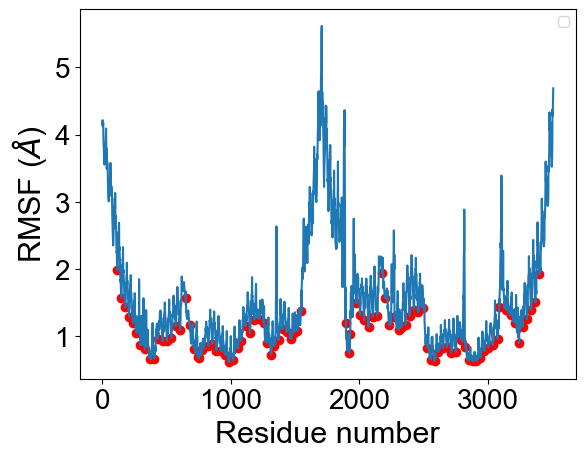

In [ ]:
plt.plot(heavy_atm.ids, R.results.rmsf)
plt.scatter(heavy_atm_stable,values, c='red')
plt.xlabel('Residue number')
plt.ylabel('RMSF ($\AA$)')
#plt.axvspan(122, 159, zorder=0, alpha=0.2, color='orange', label='LID')
#plt.axvspan(30, 59, zorder=0, alpha=0.2, color='green', label='NMP')
plt.legend()


In [ ]:
sel="nucleic and not name H* and ("

In [ ]:
for i in range(len(heavy_atm_stable)):
    if i != len(heavy_atm_stable)-1:
        sel+='index ' +str(heavy_atm_stable[i])
        sel+=" or "
    else:
        sel+='index ' +str(heavy_atm_stable[i])
sel+=")"

In [ ]:
sel

'nucleic and not name H* and (index 117 or index 147 or index 178 or index 208 or index 238 or index 263 or index 297 or index 331 or index 374 or index 402 or index 433 or index 469 or index 503 or index 537 or index 571 or index 605 or index 649 or index 682 or index 713 or index 743 or index 750 or index 776 or index 825 or index 856 or index 888 or index 924 or index 958 or index 988 or index 1015 or index 1053 or index 1081 or index 1114 or index 1148 or index 1183 or index 1222 or index 1254 or index 1281 or index 1312 or index 1336 or index 1372 or index 1403 or index 1433 or index 1471 or index 1490 or index 1517 or index 1549 or index 1895 or index 1920 or index 1929 or index 1976 or index 2007 or index 2037 or index 2071 or index 2105 or index 2139 or index 2177 or index 2200 or index 2229 or index 2273 or index 2305 or index 2327 or index 2359 or index 2390 or index 2423 or index 2459 or index 2497 or index 2526 or index 2556 or index 2585 or index 2615 or index 2651 or inde

In [ ]:
sel_fmnribo='nucleic and not name H* and (index 117 or index 147 or index 178 or index 208 or index 238 or index 263 or index 297 or index 331 or index 374 or index 402 or index 433 or index 469 or index 503 or index 537 or index 571 or index 605 or index 649 or index 682 or index 713 or index 743 or index 750 or index 776 or index 825 or index 856 or index 888 or index 924 or index 958 or index 988 or index 1015 or index 1053 or index 1081 or index 1114 or index 1148 or index 1183 or index 1222 or index 1254 or index 1281 or index 1312 or index 1336 or index 1372 or index 1403 or index 1433 or index 1471 or index 1490 or index 1517 or index 1549 or index 1895 or index 1920 or index 1929 or index 1976 or index 2007 or index 2037 or index 2071 or index 2105 or index 2139 or index 2177 or index 2200 or index 2229 or index 2273 or index 2305 or index 2327 or index 2359 or index 2390 or index 2423 or index 2459 or index 2497 or index 2526 or index 2556 or index 2585 or index 2615 or index 2651 or index 2681 or index 2715 or index 2750 or index 2793 or index 2821 or index 2853 or index 2886 or index 2907 or index 2942 or index 2973 or index 3004 or index 3038 or index 3075 or index 3087 or index 3142 or index 3176 or index 3210 or index 3243 or index 3269 or index 3303 or index 3336 or index 3369 or index 3401)'


### RMSD calculation

In [ ]:
RNA_bound_1 = rms.RMSD(fmnribo_bound_1, fmnribo_bound_1, select=sel_fmnribo, groupselections=['resname RBF and not name H*'], ref_frame=0)
RNA_bound_1.run()
# RNA_bound_2 = rms.RMSD(fmnribo_bound_2, fmnribo_bound_2, select=sel_fmnribo, groupselections=['resname RBF and not name H*'], ref_frame=0)
# RNA_bound_2.run()
# RNA_bound_3 = rms.RMSD(fmnribo_bound_3, fmnribo_bound_3, select=sel_fmnribo, groupselections=['resname RBF and not name H*'], ref_frame=0)
# RNA_bound_3.run()

### RF kinase bound

In [ ]:
rfkinase_bound_cat=mda.Universe(path+'rfkinase_bound_1.tpr',
                       path+'rfkinase_bound_1.xtc', 
                       path+'rfkinase_bound_2.xtc',
                       path+'rfkinase_bound_3.xtc', in_memory=True) 

In [ ]:
average = align.AverageStructure(rfkinase_bound_cat, rfkinase_bound_cat, select='protein and not name H*',
                                 ref_frame=0).run()
ref = average.results.universe



In [ ]:
heavy_atm = rfkinase_bound_cat.select_atoms('protein and not name H*')
R_prot = rms.RMSF(heavy_atm).run()

In [ ]:
heavy_atm_stable_prot=[]
values_prot=[]
for i in np.unique(heavy_atm.atoms.resids):
    idx=np.where(heavy_atm.atoms.resids==i)
    min_i=R_prot.results.rmsf[idx].min()
    lowest=heavy_atm.atoms.indices[idx][np.where(R_prot.results.rmsf[idx]==min_i)[0][0]]
    if min_i<2.0:
        heavy_atm_stable_prot.append(lowest)
        values_prot.append(min_i)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


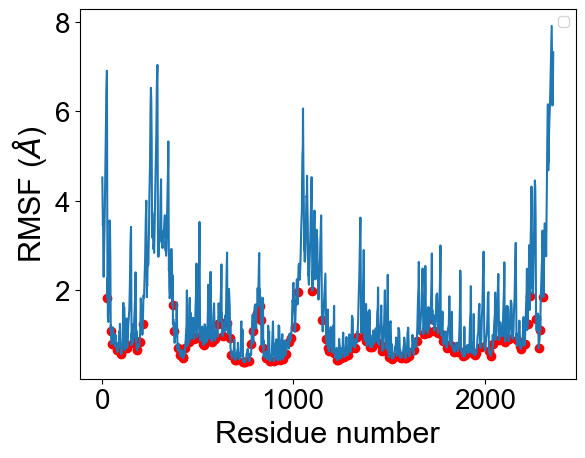

In [ ]:
plt.plot(heavy_atm.ids, R_prot.results.rmsf)
plt.scatter(heavy_atm_stable_prot,values_prot, c='red')
plt.xlabel('Residue number')
plt.ylabel('RMSF ($\AA$)')
#plt.axvspan(122, 159, zorder=0, alpha=0.2, color='orange', label='LID')
#plt.axvspan(30, 59, zorder=0, alpha=0.2, color='green', label='NMP')
plt.legend()


In [ ]:
rfkinase_bound_cat.select_atoms(f'protein and not name H* and index 5')

<AtomGroup with 1 atom>

In [ ]:
sel="protein and not name H* and ("

In [ ]:
for i in range(len(heavy_atm_stable_prot)):
    if i != len(heavy_atm_stable_prot)-1:
        sel+='index ' +str(heavy_atm_stable_prot[i])
        sel+=" or "
    else:
        sel+='index ' +str(heavy_atm_stable_prot[i])
sel+=")"

In [ ]:
sel

'protein and not name H* and (index 28 or index 45 or index 49 or index 76 or index 99 or index 101 or index 130 or index 132 or index 162 or index 178 or index 184 or index 196 or index 212 or index 368 or index 375 or index 394 or index 408 or index 422 or index 424 or index 434 or index 455 or index 481 or index 496 or index 512 or index 528 or index 530 or index 546 or index 570 or index 574 or index 591 or index 605 or index 625 or index 631 or index 655 or index 669 or index 676 or index 695 or index 699 or index 737 or index 744 or index 748 or index 770 or index 780 or index 791 or index 807 or index 823 or index 830 or index 842 or index 858 or index 875 or index 879 or index 899 or index 930 or index 946 or index 948 or index 959 or index 978 or index 987 or index 1009 or index 1023 or index 1099 or index 1150 or index 1171 or index 1182 or index 1186 or index 1214 or index 1228 or index 1232 or index 1247 or index 1266 or index 1283 or index 1300 or index 1322 or index 1334 

In [ ]:
sel_rfkinase='protein and not name H* and (index 28 or index 45 or index 49 or index 76 or index 99 or index 101 or index 130 or index 132 or index 162 or index 178 or index 184 or index 196 or index 212 or index 368 or index 375 or index 394 or index 408 or index 422 or index 424 or index 434 or index 455 or index 481 or index 496 or index 512 or index 528 or index 530 or index 546 or index 570 or index 574 or index 591 or index 605 or index 625 or index 631 or index 655 or index 669 or index 676 or index 695 or index 699 or index 737 or index 744 or index 748 or index 770 or index 780 or index 791 or index 807 or index 823 or index 830 or index 842 or index 858 or index 875 or index 879 or index 899 or index 930 or index 946 or index 948 or index 959 or index 978 or index 987 or index 1009 or index 1023 or index 1099 or index 1150 or index 1171 or index 1182 or index 1186 or index 1214 or index 1228 or index 1232 or index 1247 or index 1266 or index 1283 or index 1300 or index 1322 or index 1334 or index 1369 or index 1381 or index 1401 or index 1410 or index 1424 or index 1444 or index 1463 or index 1465 or index 1496 or index 1500 or index 1516 or index 1524 or index 1557 or index 1564 or index 1585 or index 1587 or index 1606 or index 1630 or index 1644 or index 1680 or index 1693 or index 1702 or index 1715 or index 1737 or index 1756 or index 1771 or index 1782 or index 1801 or index 1820 or index 1830 or index 1840 or index 1859 or index 1861 or index 1883 or index 1887 or index 1897 or index 1916 or index 1944 or index 1948 or index 1956 or index 1978 or index 2022 or index 2031 or index 2043 or index 2076 or index 2089 or index 2104 or index 2108 or index 2127 or index 2166 or index 2185 or index 2187 or index 2209 or index 2224 or index 2236 or index 2269 or index 2282 or index 2290 or index 2307)'


In [ ]:
R_bound_1 = rms.RMSD(rfkinase_bound_1, rfkinase_bound_1, select=sel_rfkinase, groupselections=['resname RBF and not name H*'], ref_frame=0)
R_bound_1.run()
#R_bound_2 = rms.RMSD(rfkinase_bound_2, rfkinase_bound_2, select=sel_rfkinase, groupselections=['resname RBF and not name H*'], ref_frame=0)
#R_bound_2.run()
#R_bound_3 = rms.RMSD(rfkinase_bound_3, rfkinase_bound_3, select=sel_rfkinase, groupselections=['resname RBF and not name H*'], ref_frame=0)
#R_bound_3.run()

In [ ]:
np.concatenate((R_holo_1.results.rmsd[:,3],R_holo_2.results.rmsd[:,3],R_holo_3.results.rmsd[:,3])).std()

0.2506205722500888

In [ ]:
np.concatenate((R_holo_1.results.rmsd[:,3],R_holo_2.results.rmsd[:,3],R_holo_3.results.rmsd[:,3])).mean()

1.6587320135533308

In [ ]:
np.concatenate((RNA_holo_1.results.rmsd[:,3],RNA_holo_2.results.rmsd[:,3],RNA_holo_3.results.rmsd[:,3])).std()

0.45428547905043265

In [ ]:
np.concatenate((RNA_holo_1.results.rmsd[:,3],RNA_holo_2.results.rmsd[:,3],RNA_holo_3.results.rmsd[:,3])).mean()

1.0991648778032117

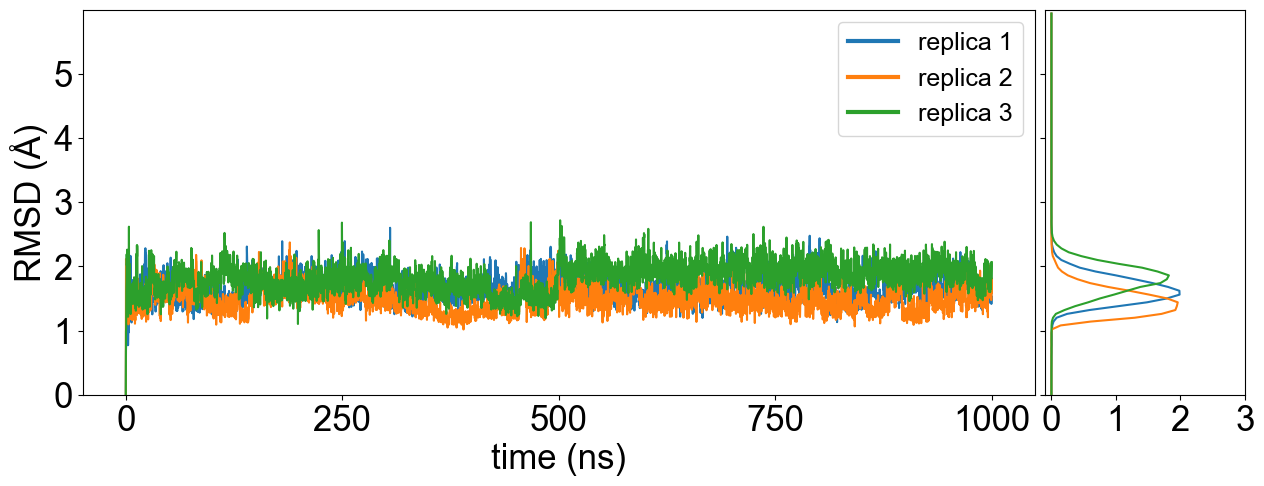

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(R_holo_1.results.rmsd[:,1][::10]/1000,R_holo_1.results.rmsd[:,3][::10], label='replica 1')
ax.plot(R_holo_2.results.rmsd[:,1][::10]/1000,R_holo_2.results.rmsd[:,3][::10], label='replica 2')
ax.plot(R_holo_3.results.rmsd[:,1][::10]/1000,R_holo_3.results.rmsd[:,3][::10], label='replica 3')
plt.xlabel('time (ns)',fontsize=25)
plt.ylabel('RMSD (Å)',fontsize=25)
plt.xticks([0,250,500,750,1000],fontsize=25)
plt.yticks([0,1,2,3,4,5],fontsize=25)
plt.ylim(0,6)
leg=plt.legend(fontsize=18, loc="upper right")  
for line in leg.get_lines():
    line.set_linewidth(3.0)
#plt.title('prot CA RMSD Holo',fontsize=16)
divider = make_axes_locatable(ax)
ax_histy = divider.append_axes("right", 2, pad=0.1, sharey=ax)
#ax_histy.hist(R.results.rmsd[:,2], bins=20, orientation='horizontal',histtype='step')
#y,x=np.histogram(R[:,2], bins=100,density=True)
#ax_histy.plot((y+y)/2,x[:-1])
y,x=np.histogram(R_holo_1.results.rmsd[:,3], bins=100,density=True,range=(0,6))
ax_histy.plot((y+y)/2,x[:-1])
y,x=np.histogram(R_holo_2.results.rmsd[:,3], bins=100,density=True,range=(0,6))
ax_histy.plot((y+y)/2,x[:-1])
y,x=np.histogram(R_holo_3.results.rmsd[:,3], bins=100,density=True,range=(0,6))
ax_histy.plot((y+y)/2,x[:-1])
ax_histy.set_xticks([0,1,2,3])
plt.xticks(fontsize=25)

plt.yticks(fontsize=0)
#plt.savefig('updated_img/RMSD_prot_lig_heavy_rmsf_timeseries.png', dpi=300, bbox_inches='tight')


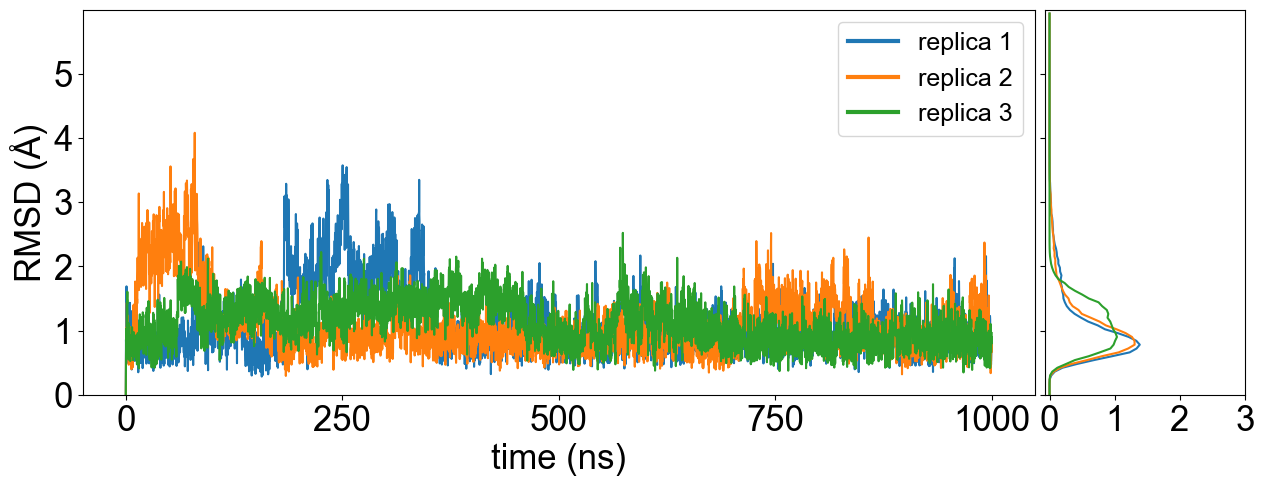

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(RNA_holo_1.results.rmsd[:,1][::10]/1000,RNA_holo_1.results.rmsd[:,3][::10], label='replica 1')
ax.plot(RNA_holo_2.results.rmsd[:,1][::10]/1000,RNA_holo_2.results.rmsd[:,3][::10], label='replica 2')
ax.plot(RNA_holo_3.results.rmsd[:,1][::10]/1000,RNA_holo_3.results.rmsd[:,3][::10], label='replica 3')
plt.xlabel('time (ns)',fontsize=25)
plt.ylabel('RMSD (Å)',fontsize=25)
plt.xticks([0,250,500,750,1000],fontsize=25)
plt.yticks([0,1,2,3,4,5],fontsize=25)
plt.ylim(0,6)
leg=plt.legend(fontsize=18, loc="upper right")  
for line in leg.get_lines():
    line.set_linewidth(3.0)
#plt.title('prot CA RMSD Holo',fontsize=16)
divider = make_axes_locatable(ax)
ax_histy = divider.append_axes("right", 2, pad=0.1, sharey=ax)
#ax_histy.hist(R.results.rmsd[:,2], bins=20, orientation='horizontal',histtype='step')
#y,x=np.histogram(R[:,2], bins=100,density=True)
#ax_histy.plot((y+y)/2,x[:-1])
y,x=np.histogram(RNA_holo_1.results.rmsd[:,3], bins=100,density=True,range=(0,6))
ax_histy.plot((y+y)/2,x[:-1])
y,x=np.histogram(RNA_holo_2.results.rmsd[:,3], bins=100,density=True,range=(0,6))
ax_histy.plot((y+y)/2,x[:-1])
y,x=np.histogram(RNA_holo_3.results.rmsd[:,3], bins=100,density=True,range=(0,6))
ax_histy.plot((y+y)/2,x[:-1])
ax_histy.set_xticks([0,1,2,3])
plt.xticks(fontsize=25)

plt.yticks(fontsize=0)
#plt.savefig('updated_img/RMSD_RNA_lig_heavy_rmsf_timeseries.png', dpi=300, bbox_inches='tight')


In [ ]:
y_prot_lig,x_prot_lig=np.histogram((np.concatenate((R_holo_1.results.rmsd[:,3],R_holo_2.results.rmsd[:,3],R_holo_3.results.rmsd[:,3]))), bins=200,density=True, range=(0,5))


In [ ]:
y_rna_lig,x_rna_lig=np.histogram((np.concatenate((RNA_holo_1.results.rmsd[:,3],RNA_holo_2.results.rmsd[:,3],RNA_holo_3.results.rmsd[:,3]))), bins=200,density=True, range=(0,5))


## Dihedrals

### RF kinase

In [ ]:
C1=rfkinase_bound_1.select_atoms('resname RBF and name C10')
C2=rfkinase_bound_1.select_atoms('resname RBF and name C11')
N1=rfkinase_bound_1.select_atoms('resname RBF and name N4')
C3=rfkinase_bound_1.select_atoms('resname RBF and name C13')
C4=rfkinase_bound_1.select_atoms('resname RBF and name C14')
C5=rfkinase_bound_1.select_atoms('resname RBF and name C15')
C6=rfkinase_bound_1.select_atoms('resname RBF and name C16')
C7=rfkinase_bound_1.select_atoms('resname RBF and name C17')
O7=rfkinase_bound_1.select_atoms('resname RBF and name O6')

In [ ]:
di_1=C1+C2+N1+C3
di_2=N1+C3+C4+C5
di_3=C3+C4+C5+C6
di_4=C4+C5+C6+C7
di_5=C5+C6+C7+O7

In [ ]:
dihedrals=np.empty((len(prot_holo_1.trajectory),5))
for i,ts in enumerate(prot_holo_1.trajectory):
    dihedrals[i,0]=di_1.dihedral.value()
    dihedrals[i,1]=di_2.dihedral.value()
    dihedrals[i,2]=di_3.dihedral.value()
    dihedrals[i,3]=di_4.dihedral.value()    
    dihedrals[i,4]=di_5.dihedral.value()    

In [ ]:
np.save("../data/dihedrals_prot_1.npy", dihedrals)

### FMN ribo

In [ ]:
C1=fmnribo_bound_1.select_atoms('resname RBF and name C10')
C2=fmnribo_bound_1.select_atoms('resname RBF and name C11')
N1=fmnribo_bound_1.select_atoms('resname RBF and name N4')
C3=fmnribo_bound_1.select_atoms('resname RBF and name C13')
C4=fmnribo_bound_1.select_atoms('resname RBF and name C14')
C5=fmnribo_bound_1.select_atoms('resname RBF and name C15')
C6=fmnribo_bound_1.select_atoms('resname RBF and name C16')
C7=fmnribo_bound_1.select_atoms('resname RBF and name C17')
O7=fmnribo_bound_1.select_atoms('resname RBF and name O6')

In [ ]:
di_1=C1+C2+N1+C3
di_2=N1+C3+C4+C5
di_3=C3+C4+C5+C6
di_4=C4+C5+C6+C7
di_5=C5+C6+C7+O7

In [ ]:
dihedrals=np.empty((len(fmnribo_bound_1.trajectory),5))
for i,ts in enumerate(fmnribo_bound_1.trajectory):
    dihedrals[i,0]=di_1.dihedral.value()
    dihedrals[i,1]=di_2.dihedral.value()
    dihedrals[i,2]=di_3.dihedral.value()
    dihedrals[i,3]=di_4.dihedral.value()    
    dihedrals[i,4]=di_5.dihedral.value()    

In [ ]:
np.save("../data/dihedrals_rna_1.npy", dihedrals)

## HBONDS

### RF kinase

In [ ]:
HB_prot_1=HBA(rfkinase_bound_1, donors_sel='resname RBF', acceptors_sel='protein or name MG*').run()

/home/stefano/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:765: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, resname RBF, and Acceptor, protein or name MG*.
  warnings.warn(


In [ ]:

with open("../data/HB_prot_1.pkl", "wb") as pickle_file:
    pickle.dump(HB_prot_1.results, pickle_file)


In [ ]:
HB_prot_1=HBA(rfkinase_bound_1, donors_sel='protein or name MG*', acceptors_sel='resname RBF').run()

/home/stefano/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:765: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, protein or name MG*, and Acceptor, resname RBF.
  warnings.warn(
/home/stefano/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:733: UserWarning: No hydrogen bonds were found given d-a cutoff of 3.0 between Donor, protein or name MG*, and Acceptor, resname RBF.
  warnings.warn(


In [ ]:

with open("../data/HB_prot_acceptor_1.pkl", "wb") as pickle_file:
    pickle.dump(HB_prot_1.results, pickle_file)


### FMNribo

In [ ]:
HB_rna_1=HBA(fmnribo_bound_1, donors_sel='resname RBF', acceptors_sel='nucleic or name MG*').run()

/home/stefano/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:765: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, resname RBF, and Acceptor, nucleic or name MG*.
  warnings.warn(


In [ ]:
with open("../data/HB_rna_1.pkl", "wb") as pickle_file:
    pickle.dump(HB_rna_1.results, pickle_file)


In [ ]:
del HB_rna_1

In [ ]:
HB_rna_1=HBA(fmnribo_bound_1, donors_sel='nucleic or name MG*', acceptors_sel='resname RBF').run()

/home/stefano/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:765: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, nucleic or name MG*, and Acceptor, resname RBF.
  warnings.warn(


In [ ]:
with open("../data/HB_rna_acceptor_1.pkl", "wb") as pickle_file:
    pickle.dump(HB_rna_1.results, pickle_file)


## RF kinase pocket Identification

In [ ]:
contacts=dict.fromkeys((np.unique(rfkinase_bound_1.select_atoms("not name H* and protein").resids)),0)

In [ ]:
for ts in rfkinase_bound_1.trajectory:
    for x in (np.unique(rfkinase_bound_1.select_atoms("not name H* and protein and around 6 resname RBF",updating=True).resids)):
        contacts[x]+=1

In [ ]:
for ts in rfkinase_bound_2.trajectory:
    for x in (np.unique(rfkinase_bound_2.select_atoms("not name H* and protein and around 6 resname RBF",updating=True).resids)):
        contacts[x]+=1

In [ ]:
for ts in rfkinase_bound_3.trajectory:
    for x in (np.unique(rfkinase_bound_3.select_atoms("not name H* and protein and around 6 resname RBF",updating=True).resids)):
        contacts[x]+=1

In [ ]:
for x in contacts.keys():
    contacts[x]=contacts[x]/(len(rfkinase_bound_3.trajectory)*3)

In [ ]:
contacts_val=[x for x in contacts.values()]

In [ ]:
pocket_rfkinase=[resid for resid, freq in contacts.items() if freq > 0.75]

## FMN ribo pocket Identification

In [ ]:
contacts_rna=dict.fromkeys((np.unique(fmnribo_bound_1.select_atoms("not name H* and nucleic").resids)),0)

In [ ]:
for ts in fmnribo_bound_1.trajectory:
    for x in (np.unique(fmnribo_bound_1.select_atoms("not name H* and nucleic and around 6 resname RBF",updating=True).resids)):
        contacts_rna[x]+=1

In [ ]:
for ts in fmnribo_bound_2.trajectory:
    for x in (np.unique(fmnribo_bound_2.select_atoms("not name H* and nucleic and around 6 resname RBF",updating=True).resids)):
        contacts_rna[x]+=1

In [ ]:
for ts in fmnribo_bound_3.trajectory:
    for x in (np.unique(fmnribo_bound_3.select_atoms("not name H* and nucleic and around 6 resname RBF",updating=True).resids)):
        contacts_rna[x]+=1

In [ ]:
for x in contacts_rna.keys():
    contacts_rna[x]=contacts_rna[x]/(len(fmnribo_bound_1.trajectory)*3)

In [ ]:
pocket_rna=[resid for resid, freq in contacts_rna.items() if freq > 0.75]

In [ ]:
np.save("pocket_protein.txt",np.array(pocket_protein))
np.save("pocket_rna.txt",np.array(pocket_rna))

## Dimensionality reduction

### RF kinase

In [ ]:
pocket_protein=np.load("pocket_protein.txt.npy")

In [ ]:
pocket_protein_0based=[x-1 for x in pocket_protein]

In [ ]:
pocket_prot_apo_1=rfkinase_unbound_1.select_atoms(f"not backbone and resid {pocket_protein[0]} {pocket_protein[1]} {pocket_protein[2]} {pocket_protein[3]} {pocket_protein[4]} {pocket_protein[5]} {pocket_protein[6]} {pocket_protein[7]} {pocket_protein[8]} {pocket_protein[9]} {pocket_protein[10]} {pocket_protein[11]} {pocket_protein[12]} {pocket_protein[13]} {pocket_protein[14]} {pocket_protein[15]} {pocket_protein[16]} {pocket_protein[17]}")
pocket_prot_apo_2=rfkinase_unbound_2.select_atoms(f"not backbone and resid {pocket_protein[0]} {pocket_protein[1]} {pocket_protein[2]} {pocket_protein[3]} {pocket_protein[4]} {pocket_protein[5]} {pocket_protein[6]} {pocket_protein[7]} {pocket_protein[8]} {pocket_protein[9]} {pocket_protein[10]} {pocket_protein[11]} {pocket_protein[12]} {pocket_protein[13]} {pocket_protein[14]} {pocket_protein[15]} {pocket_protein[16]} {pocket_protein[17]}")
pocket_prot_apo_3=rfkinase_unbound_3.select_atoms(f"not backbone and resid {pocket_protein[0]} {pocket_protein[1]} {pocket_protein[2]} {pocket_protein[3]} {pocket_protein[4]} {pocket_protein[5]} {pocket_protein[6]} {pocket_protein[7]} {pocket_protein[8]} {pocket_protein[9]} {pocket_protein[10]} {pocket_protein[11]} {pocket_protein[12]} {pocket_protein[13]} {pocket_protein[14]} {pocket_protein[15]} {pocket_protein[16]} {pocket_protein[17]}")


In [ ]:
comb = [x for x in combinations(pocket_protein_0based, 2)]

In [ ]:
mdt_prot_a=md.load('../trjs/prod_prot_apo_1_1_POVME_fit.pdb',
                   top='../trjs/ref_rf_unbound.pdb')
mdt_prot_a2=md.load('../trjs/prod_prot_apo_2_1_POVME_fit.pdb',
                   top='../trjs/ref_rf_unbound.pdb')
mdt_prot_a3=md.load('../trjs/prod_prot_apo_3_1_POVME_fit.pdb',
                   top='../trjs/ref_rf_unbound.pdb')

In [ ]:
minimum_dist_a=md.compute_contacts(mdt_prot_a,comb)

In [ ]:
minimum_dist_a2=md.compute_contacts(mdt_prot_a2,comb)

In [ ]:
minimum_dist_a3=md.compute_contacts(mdt_prot_a3,comb)

In [ ]:
mdt_prot_h=md.load('../trjs/prod_prot_holo_1_1_POVME_fit.pdb',
                   top='/../trjs/ref_rf_bound.pdb')
mdt_prot_h2=md.load('../trjs/prod_prot_holo_2_1_POVME_fit.pdb',
                   top='../trjs/ref_rf_bound.pdb')
mdt_prot_h3=md.load('../trjs/prod_prot_holo_3_1_POVME_fit.pdb',
                   top='../trjs/ref_rf_bound.pdb')

In [ ]:
minimum_dist_h=md.compute_contacts(mdt_prot_h,comb)

In [ ]:
minimum_dist_h2=md.compute_contacts(mdt_prot_h2,comb)

In [ ]:
minimum_dist_h3=md.compute_contacts(mdt_prot_h3,comb)

In [ ]:
min_dist_prot=np.concatenate((minimum_dist_h[0],minimum_dist_h2[0],minimum_dist_h3[0],minimum_dist_a[0],minimum_dist_a2[0],minimum_dist_a3[0]))

In [ ]:
min_dist_prot=np.load("min_dist_proten_holo-apo_red.npy")

In [ ]:
pca=PCA(n_components=50)

In [ ]:
min_dist_pca=pca.fit_transform(min_dist_prot)

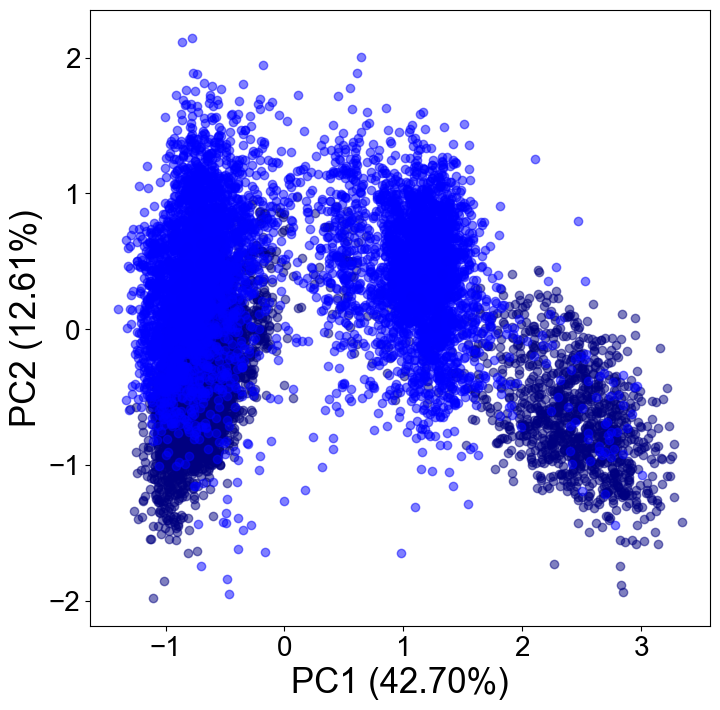

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(min_dist_pca[:6000,0],min_dist_pca[:6000,1], "o",c="navy",alpha=0.5)
plt.plot(min_dist_pca[6000:,0],min_dist_pca[6000:,1], "o",c="blue",alpha=0.5)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)",fontsize=25)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)",fontsize=25)
plt.savefig('./updated_img/PCA_prot.png', dpi=300, bbox_inches='tight')


In [ ]:
df_data=pd.DataFrame(min_dist_pca[:,:2], columns=["PC1 (42.70%)","PC2 (12.61%)"])

In [ ]:
df_data["Type"]="Holo"

In [ ]:
df_data.loc[:6003,"Type"]="Apo"

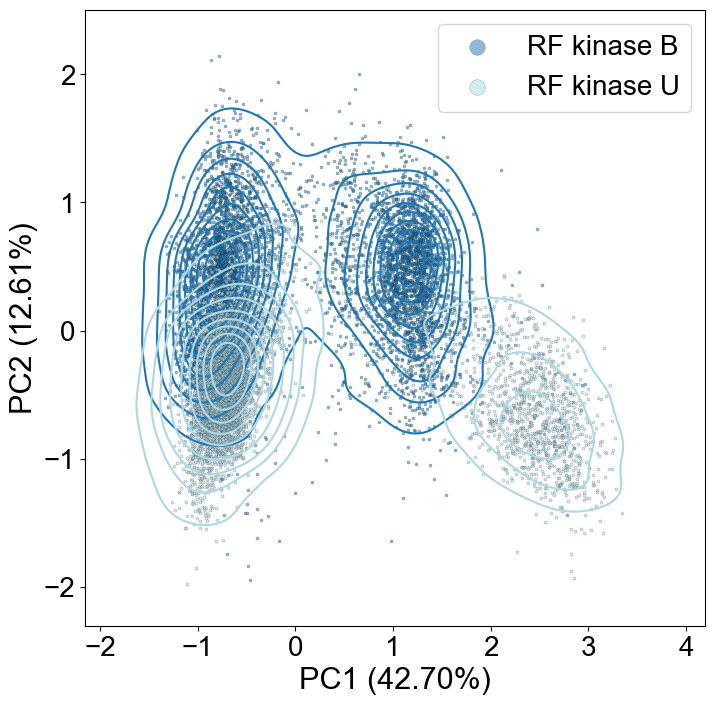

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.kdeplot(data=df_data.loc[6002:],x="PC1 (42.70%)", y="PC2 (12.61%)", ax=ax, color="C0")
sns.scatterplot(data=df_data.loc[6002:],x="PC1 (42.70%)", y="PC2 (12.61%)", ax=ax, color="C0",s=5,edgecolor="black",linewidth=0.2,alpha=0.5,label="RF kinase B")
sns.scatterplot(data=df_data.loc[:6002],x="PC1 (42.70%)", y="PC2 (12.61%)", ax=ax, color="lightblue",s=5,edgecolor="black",linewidth=0.2,alpha=0.5,label="RF kinase U")
sns.kdeplot(data=df_data.loc[:6002],x="PC1 (42.70%)", y="PC2 (12.61%)", ax=ax, color="lightblue")
plt.xticks=[-2,-1,0,1,2]
plt.yticks=[-2,-1,0,1,2]
plt.legend(fontsize=20, markerscale=5) 
plt.savefig("updated_img/pca-prot-level-plt_corr.png", dpi=300, bbox_inches='tight')

In [ ]:
tsne=TSNE(n_components=2,init="pca", n_iter=10000,n_jobs=-1, perplexity=np.sqrt(6000), random_state=42)

In [ ]:
min_dist_tsne=tsne.fit_transform(min_dist_prot)

In [ ]:
df_data=pd.DataFrame(min_dist_tsne, columns=["t-SNE-1","t-SNE-2"])

In [ ]:
df_scaled=pd.DataFrame(MinMaxScaler().fit_transform(df_data), columns=df_data.columns)

In [ ]:
df_scaled["Type"]="Holo"

In [ ]:
df_scaled.loc[6003:,"Type"]="Apo"

In [ ]:
df_scaled.to_csv("tsne-prot-level-plt-sclaed-scatter.csv")

In [ ]:
np.save("min_dist_prot_tsne_mod.npy",tsne_prot)

In [ ]:
np.save("min_dist_prot_tsne.npy",min_dist_tsne)

### FMN ribo 

In [ ]:
pocket_rna=np.load("pocket_rna.txt.npy")

In [ ]:
pocket_rna_0based=[x-1 for x in pocket_rna]

In [ ]:
comb = [x for x in combinations(pocket_rna_0based, 2)]

In [ ]:
mdt_rna_a=md.load(path+'./PDBs/fmnribo_unbound_1.pdb',
                   top=path+'./PDBs/ref_fmn_bound.pdb')
mdt_rna_a2=md.load(path+'fmnribo_unbound_2.pdb',
                   top=path+'./PDBs/ref_fmn_bound.pdb')
mdt_rna_a3=md.load(path+'fmnribo_unbound_3.pdb',
                   top=path+'./PDBs/ref_fmn_bound.pdb')

In [ ]:
minimum_dist_a=md.compute_contacts(mdt_rna_a,comb)

In [ ]:
minimum_dist_a2=md.compute_contacts(mdt_rna_a2,comb)

In [ ]:
minimum_dist_a3=md.compute_contacts(mdt_rna_a3,comb)

In [ ]:
mdt_rna_h=md.load(path+'./PDBs/fmnribo_bound_1.pdb',
                   top=path+'./PDBs/ref_fmn_bound.pdb')
mdt_rna_h2=md.load(path+'./PDBs/fmnribo_bound_2.pdb',
                   top=path+'./PDBs/ref_fmn_bound.pdb')
mdt_rna_h3=md.load(path+'./PDBs/fmnribo_unbound_3.pdb',
                   top=path+'./PDBs/ref_fmn_bound.pdb')

In [ ]:
minimum_dist_h=md.compute_contacts(mdt_rna_h,comb)

In [ ]:
minimum_dist_h2=md.compute_contacts(mdt_rna_h2,comb)

In [ ]:
minimum_dist_h3=md.compute_contacts(mdt_rna_h3,comb)

In [ ]:
min_dist_rna=np.concatenate((minimum_dist_h[0],minimum_dist_h2[0],minimum_dist_h3[0],minimum_dist_a[0],minimum_dist_a2[0],minimum_dist_a3[0]))

In [ ]:
np.save("min_dist_rna_holo-apo_mod.npy",min_dist_rna)

In [ ]:
min_dist_rna=np.load("min_dist_rna_holo-apo_mod.npy")

In [ ]:
pca=PCA()

In [ ]:
min_dist_pca_rna=pca.fit_transform(min_dist_rna)

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(min_dist_pca_rna[:6002,0],min_dist_pca_rna[:6002,2], "o",alpha=0.5, c="#ffb22b")
plt.plot(min_dist_pca_rna[6002:,0],min_dist_pca_rna[6002:,2], "o",alpha=0.5, c="darkorange")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)",fontsize=25)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)",fontsize=25)
plt.yticks(labels=[-2,-1,0,1,2])
plt.savefig('updated_img/pca-rna.png', dpi=300, bbox_inches='tight')


In [ ]:
df_data=pd.DataFrame(min_dist_pca_rna[:,:2], columns=["PC1 (32.91%)","PC2 (19.81%)"])

In [ ]:
df_data["Type"]="Holo"

In [ ]:
df_data.loc[6000:,"Type"]="Apo"

In [ ]:
tsne=TSNE(n_components=2,init="pca", n_iter=10000,n_jobs=-1, perplexity=np.sqrt(6000), random_state=42)

In [ ]:
min_dist_tsne=tsne.fit_transform(min_dist_rna)

In [ ]:
np.save("min_dist_rna_tsne_mod.npy",min_dist_tsne)

## Water analysis

### RFkinase bound

In [ ]:
rfkinase_bound_1=mda.Universe("RF_kinase_bound_1.tpr",
                        "RF_kinase_bound_1.xtc")

In [ ]:
pocket_protein=[20,
 23,
 25,
 27,
 46,
 62,
 64,
 79,
 81,
 104,
 106,
 107,
 108,
 109,
 115,
 119,
 122,
 123]

In [ ]:
select = (f"name OW and sphzone 10 (protein and not name H* and resid {pocket_protein[0]} {pocket_protein[1]} {pocket_protein[2]} {pocket_protein[3]} {pocket_protein[4]} {pocket_protein[5]} {pocket_protein[6]} {pocket_protein[7]} {pocket_protein[8]} {pocket_protein[9]} {pocket_protein[10]} {pocket_protein[11]} {pocket_protein[12]} {pocket_protein[13]} {pocket_protein[14]} {pocket_protein[15]} {pocket_protein[16]} {pocket_protein[17]})")  


In [ ]:
rfkinase_bound_water= sp(rfkinase_bound_1,select,verbose=True)

In [ ]:
rfkinase_bound_water.run(tau_max=200, start=None, stop=None, step=None, residues=False, intermittency=2, verbose=False)

In [ ]:
t_std=[np.std(x) for x in rfkinase_bound_water.sp_timeseries_data]

In [ ]:
np.save("PROT_HOLO_water_1.sp_timeseries.npy",np.array(rfkinase_bound_water.sp_timeseries))

In [ ]:
np.savez_compressed("PROT_HOLO_water_1",timeseries=np.array(rfkinase_bound_water.sp_timeseries),data= np.array(rfkinase_bound_water.sp_timeseries_data),tau=np.array(rfkinase_bound_water.tau_timeseries))

/tmp/ipykernel_2484372/3569795159.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.savez_compressed("PROT_HOLO_water_1",timeseries=np.array(PROT_HOLO_water.sp_timeseries),data= np.array(PROT_HOLO_water.sp_timeseries_data),tau=np.array(PROT_HOLO_water.tau_timeseries))


### RFkinase unbound

In [ ]:
rfkinase_unbound_1=mda.Universe('RF_kinase_unbound_1.tpr',
                        'RF_kinase_unbound_1.xtc')

In [ ]:
rfkinase_unbound_water= sp(rfkinase_unbound_1,select,verbose=True)

In [ ]:
rfkinase_unbound_water.run(tau_max=200, start=None, stop=None, step=None, residues=False, intermittency=2, verbose=False)

In [ ]:
t_std=[np.std(x) for x in rfkinase_unbound_water.sp_timeseries_data]

In [ ]:
np.save("PROT_APO_water_1.sp_timeseries.npy",np.array(rfkinase_unbound_water.sp_timeseries))

In [ ]:
np.savez_compressed("PROT_APO_water_1",timeseries=np.array(rfkinase_unbound_water.sp_timeseries),data= np.array(rfkinase_unbound_water.sp_timeseries_data),tau=np.array(rfkinase_unbound_water.tau_timeseries))

/tmp/ipykernel_2484372/1044971182.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.savez_compressed("PROT_APO_water_1",timeseries=np.array(PROT_APO_1_water.sp_timeseries),data= np.array(PROT_APO_1_water.sp_timeseries_data),tau=np.array(PROT_APO_1_water.tau_timeseries))


### FMNribo bound

In [ ]:
fmnribo_bound_1=mda.Universe('FMN_bound_1.tpr',
                        'FMN_bound_1_1.xtc')

In [ ]:
pocket_rna=[10, 11, 12, 48, 49, 84, 85, 93, 98, 99]

In [ ]:
select = (f"name OW and sphzone 10 (nucleic and not name H* and resid {pocket_rna[0]} {pocket_rna[1]} {pocket_rna[2]} {pocket_rna[3]} {pocket_rna[4]} {pocket_rna[5]} {pocket_rna[6]} {pocket_rna[7]} {pocket_rna[8]} {pocket_rna[9]})")  


In [ ]:
fmnribo_bound_water= sp(fmnribo_bound_1,select,verbose=True)

In [ ]:
fmnribo_bound_water.run(tau_max=200, start=None, stop=None, step=None, residues=False, intermittency=2, verbose=False)

In [ ]:
t_std=[np.std(x) for x in fmnribo_bound_water.sp_timeseries_data]

In [ ]:
np.save("RNA_HOLO_water_1.sp_timeseries.npy",np.array(fmnribo_bound_water.sp_timeseries))

In [ ]:
np.savez_compressed("RNA_HOLO_water_1",timeseries=np.array(fmnribo_bound_water.sp_timeseries),data= np.array(fmnribo_bound_water.sp_timeseries_data),tau=np.array(fmnribo_bound_water.tau_timeseries))

/tmp/ipykernel_2484372/3699101486.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.savez_compressed("RNA_HOLO_water_1",timeseries=np.array(RNA_HOLO_water.sp_timeseries),data= np.array(RNA_HOLO_water.sp_timeseries_data),tau=np.array(RNA_HOLO_water.tau_timeseries))


### FMNribo unbound

In [ ]:
fmnribo_bound_1=mda.Universe('FMN_unbound_1.tpr',
                        'FMN_unbound_1_1.xtc')

In [ ]:
select = (f"name OW and sphzone 10 (nucleic and not name H* and resid {pocket_rna[0]} {pocket_rna[1]} {pocket_rna[2]} {pocket_rna[3]} {pocket_rna[4]} {pocket_rna[5]} {pocket_rna[6]} {pocket_rna[7]} {pocket_rna[8]} {pocket_rna[9]})")  


In [ ]:
fmnribo_unbound_water= sp(fmnribo_unbound_1,select,verbose=True)

In [ ]:
fmnribo_unbound_water.run(tau_max=200, start=None, stop=None, step=None, residues=False, intermittency=2, verbose=False)

In [ ]:
t_std=[np.std(x) for x in fmnribo_unbound_water.sp_timeseries_data]

In [ ]:
np.save("RNA_APO_water_1.sp_timeseries.npy",np.array(fmnribo_unbound_water.sp_timeseries))

In [ ]:
np.savez_compressed("RNA_APO_water_1",timeseries=np.array(fmnribo_unbound_water.sp_timeseries),data= np.array(fmnribo_unbound_water.sp_timeseries_data),tau=np.array(fmnribo_unbound_water.tau_timeseries))

/tmp/ipykernel_2484372/2445195244.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.savez_compressed("RNA_APO_water_1",timeseries=np.array(RNA_APO_1_water.sp_timeseries),data= np.array(RNA_APO_1_water.sp_timeseries_data),tau=np.array(RNA_APO_1_water.tau_timeseries))


## Monitor Riboflavin-MG distance

In [ ]:
distance_o_mg_1=np.empty((len(fmn_bound_1.trajectory),1))
for ts in fmn_bound_1.trajectory:
    distance_o_mg_1[ts.frame]=mda.lib.distances.distance_array(o4.positions,mg.positions,box=fmn_bound_1.dimensions)[0][0]

In [ ]:
distance_o_mg_2=np.empty((len(fmn_bound_2.trajectory),1))
mg=fmn_bound_2.select_atoms("name MG and index 3524")
o4=fmn_bound_2.select_atoms("resname RBF and name O4")
for ts in fmn_bound_2.trajectory:
    distance_o_mg_2[ts.frame]=mda.lib.distances.distance_array(o4.positions,mg.positions,box=fmn_bound_2.dimensions)[0][0]

In [ ]:
distance_o_mg_3=np.empty((len(fmn_bound_3.trajectory),1))
mg=fmn_bound_3.select_atoms("name MG and index 3524")
o4=fmn_bound_3.select_atoms("resname RBF and name O4")
for ts in fmn_bound_3.trajectory:
    distance_o_mg_3[ts.frame]=mda.lib.distances.distance_array(o4.positions,mg.positions,box=fmn_bound_3.dimensions)[0][0]

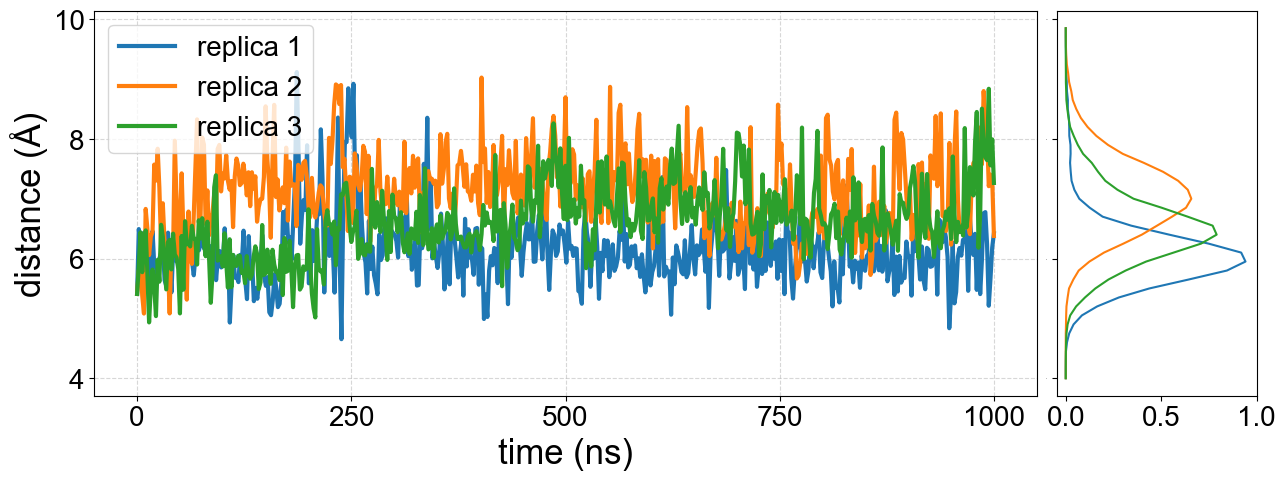

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(np.linspace(0,1000,num=len(distance_o_mg_1[::100])),distance_o_mg_1[::100], label="replica 1", lw=3)
ax.plot(np.linspace(0,1000,num=len(distance_o_mg_2[::100])),distance_o_mg_2[::100], label="replica 2", lw=3)
ax.plot(np.linspace(0,1000,num=len(distance_o_mg_3[::100])),distance_o_mg_3[::100], label="replica 3", lw=3)
ax.set_xlabel("time (ns)", fontsize=25)
ax.set_ylabel("distance (Å)", fontsize=25)
ax.legend(fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(linestyle="--", alpha=0.5)
plt.xticks([0,250,500,750,1000],fontsize=20)
divider = make_axes_locatable(ax)
ax_histy = divider.append_axes("right", 2, pad=0.2, sharey=ax)
y,x=np.histogram(distance_o_mg_1, bins=40,density=True,range=(4,10))
ax_histy.plot((y+y)/2,x[:-1])
y,x=np.histogram(distance_o_mg_2, bins=40,density=True,range=(4,10))
ax_histy.plot((y+y)/2,x[:-1])
y,x=np.histogram(distance_o_mg_3, bins=40,density=True,range=(4,10))
ax_histy.plot((y+y)/2,x[:-1])
plt.xticks([0,0.5,1],fontsize=20)
ax2.set_xlabel("probability", fontsize=25)
#ax2.tick_params(axis='x', which='major', labelsize=20)
#ax2.tick_params(axis='y', which='major', labelsize=0)

plt.yticks(fontsize=0)
plt.savefig("./updated_img/distance_o_mg.png", dpi=300, bbox_inches='tight')


# Figures

## FIG 3A

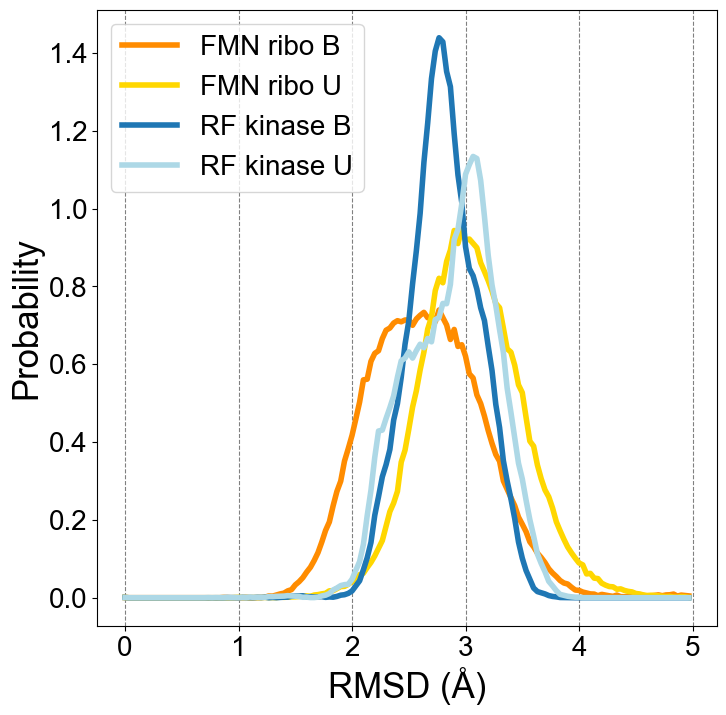

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(x_rna_holo[:-1],(y_rna_holo+y_rna_holo)/(2), label="FMN ribo B",c="darkorange", linewidth=4) #  label="FMN Riboswitch B"
plt.plot(x_rna_apo[:-1],(y_rna_apo+y_rna_apo)/(2), label="FMN ribo U",c="gold", linewidth=4)
#plt.plot(x_prot_holo[:-1],(y_prot_holo+y_prot_holo)/(2), label="RF kinase B", c="blue",linewidth=3)
#plt.plot(x_prot_apo[:-1],(y_prot_apo+y_prot_apo)/(2), label="RF kinase U", c="royalblue", linewidth=3)
plt.plot(x_prot_holo[:-1],(y_prot_holo+y_prot_holo)/(2), label="RF kinase B", c="C0",linewidth=4)
plt.plot(x_prot_apo[:-1],(y_prot_apo+y_prot_apo)/(2), label="RF kinase U", c="lightblue", linewidth=4)
plt.legend(fontsize=20)
plt.xticks([0,1,2,3,4,5])
#plt.ylim(0,0.14)
plt.grid(axis='x', ls='--', color='grey')

plt.ylabel("Probability", fontsize=25)
plt.xlabel('RMSD (Å)',fontsize=25)
plt.savefig('./updated_img/prob_RMSD_new_col.png', dpi=600, bbox_inches='tight')

## FIG 3B

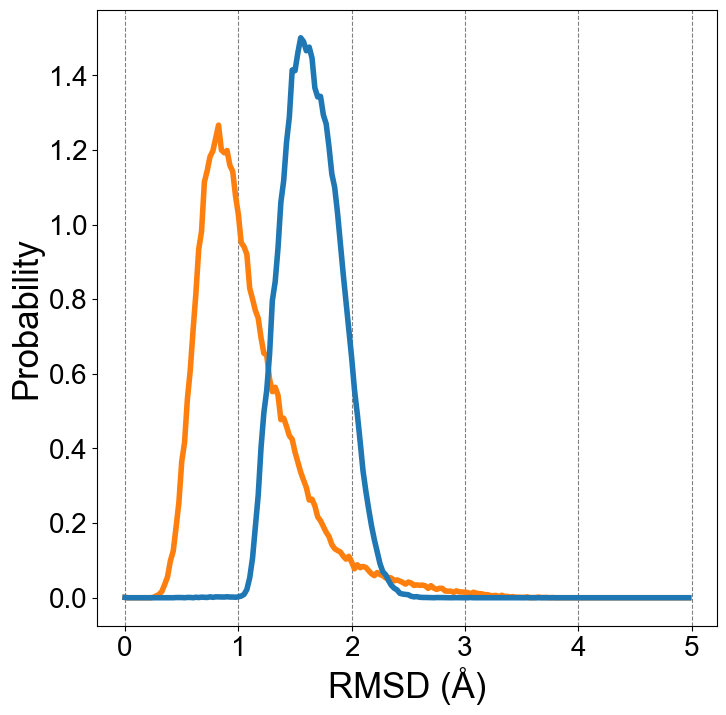

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(x_rna_lig[:-1],(y_rna_lig+y_rna_lig)/(2), label="FMN Riboswitch B",c="C1", linewidth=4)
plt.plot(x_prot_lig[:-1],(y_prot_lig+y_prot_lig)/(2), label="RF kinase B", c='C0',linewidth=4)
#plt.legend(fontsize=12)
plt.xticks([0,1,2,3,4,5])
plt.grid(axis='x', ls='--', color='grey')
#plt.ylim(0,0.14)
plt.ylabel("Probability", fontsize=25)
plt.xlabel('RMSD (Å)',fontsize=25)
plt.savefig('./updated_img/prob_RMSD_lig_aligned_RMSF_new_col.png', dpi=600, bbox_inches='tight')

## FIG 4A

In [ ]:
df_scaled=pd.read_csv("tsne-prot-level-plt-sclaed-scatter.csv", index_col=0)

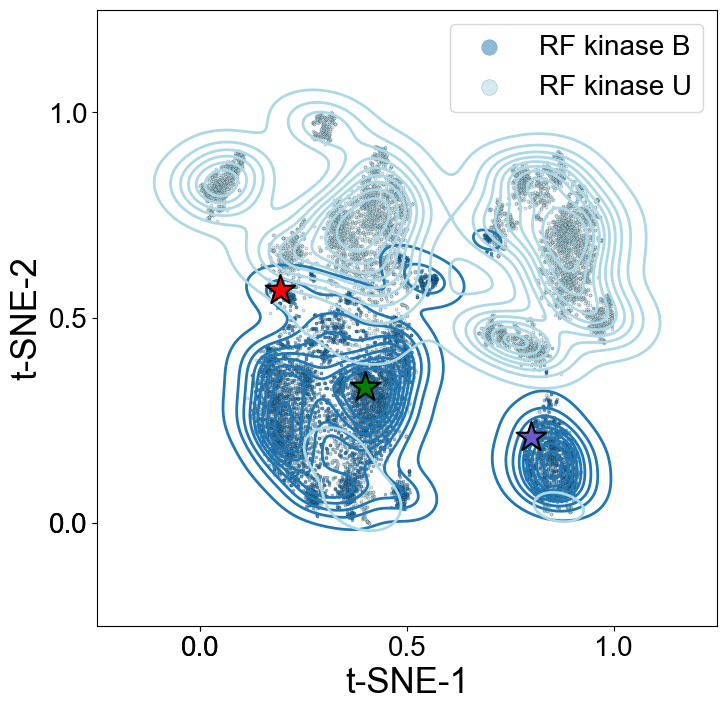

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.kdeplot(data=df_scaled.loc[:6003],x="t-SNE-1", y="t-SNE-2", ax=ax, color="C0",linewidths=2)
sns.kdeplot(data=df_scaled.loc[6003:],x="t-SNE-1", y="t-SNE-2", ax=ax, color="lightblue",linewidths=2)
sns.scatterplot(data=df_scaled.loc[:6003],x="t-SNE-1", y="t-SNE-2", ax=ax, color="C0",s=5,edgecolor="black",linewidth=0.2,alpha=0.5,label="RF kinase B")
sns.scatterplot(data=df_scaled.loc[6003:],x="t-SNE-1", y="t-SNE-2", ax=ax, color="lightblue",s=5,edgecolor="black",linewidth=0.2,alpha=0.5,label="RF kinase U")
plt.scatter(df_scaled.loc[1344*4,'t-SNE-1'],df_scaled.loc[1344*4,'t-SNE-2'], color="green", marker="*", s=500, zorder=10,edgecolor="black",lw=1.5)
plt.scatter(df_scaled.loc[822*4,'t-SNE-1'],df_scaled.loc[822*4,'t-SNE-2'], color="slateblue", marker="*", s=500, zorder=10,edgecolor="black",lw=1.5)
plt.scatter(df_scaled.loc[586*4,'t-SNE-1'],df_scaled.loc[586*4,'t-SNE-2'], color="red", marker="*", s=500, zorder=10,edgecolor="black",lw=1.5)
ax.set_xlim(-0.25,1.25)
ax.set_ylim(-0.25,1.25)
ax.set_xticks([0,0,0.5,1])
ax.set_yticks([0,0,0.5,1])
plt.legend(fontsize=20, markerscale=5)
#plt.grid(ls="--", color="grey")
plt.xlabel("t-SNE-1", fontsize=25)
plt.ylabel("t-SNE-2", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("updated_img/tsne-prot-new-col_projections.png", dpi=300, bbox_inches='tight')


## FIG 4B

In [ ]:
min_dist_tsne=np.load("min_dist_rna_tsne_mod.npy")

In [ ]:
df=pd.DataFrame(min_dist_tsne, columns=["t-SNE-1","t-SNE-2"])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_scaled=pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)

In [ ]:
df_scaled["Type"]="Holo"

In [ ]:
df_scaled.loc[6002:,"Type"]="Apo"

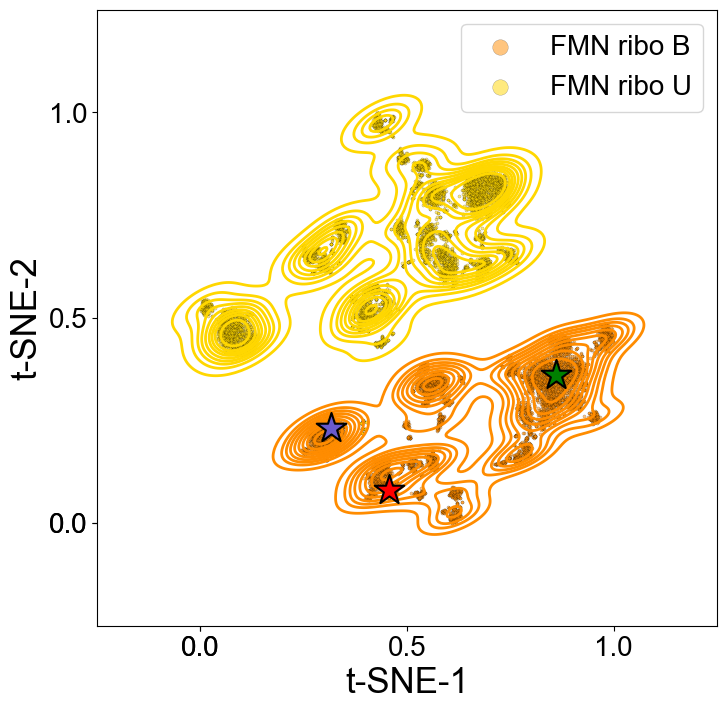

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.kdeplot(data=df_scaled.loc[:6002],x="t-SNE-1", y="t-SNE-2", ax=ax, color="darkorange",linewidths=2)
sns.kdeplot(data=df_scaled.loc[6002:],x="t-SNE-1", y="t-SNE-2", ax=ax, color="gold",linewidths=2)
sns.scatterplot(data=df_scaled.loc[:6002],x="t-SNE-1", y="t-SNE-2", ax=ax, color="darkorange",s=5,edgecolor="black",linewidth=0.2,alpha=0.5,label="FMN ribo B")

sns.scatterplot(data=df_scaled.loc[6002:],x="t-SNE-1", y="t-SNE-2", ax=ax, color="gold",s=5,edgecolor="black",linewidth=0.2,alpha=0.5,label="FMN ribo U")
plt.scatter(df_scaled.loc[483*4,'t-SNE-1'],df_scaled.loc[483*4,'t-SNE-2'], color="green", marker="*", s=500, zorder=10,edgecolor="black",lw=1.5)
plt.scatter(df_scaled.loc[1145*4,'t-SNE-1'],df_scaled.loc[1145*4,'t-SNE-2'], color="slateblue", marker="*", s=500, zorder=10,edgecolor="black",lw=1.5)
plt.scatter(df_scaled.loc[637*4,'t-SNE-1'],df_scaled.loc[637*4,'t-SNE-2'], color="red", marker="*", s=500, zorder=10,edgecolor="black",lw=1.5)

ax.set_xlim(-0.25,1.25)
ax.set_ylim(-0.25,1.25)
ax.set_xticks([0,0,0.5,1])
ax.set_yticks([0,0,0.5,1])
plt.legend(fontsize=20, markerscale=5)
#plt.grid(ls="--", color="grey")
#plt.show()
plt.xlabel("t-SNE-1", fontsize=25)
plt.ylabel("t-SNE-2", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("updated_img/tsne-rna-new-col_projections.png", dpi=300, bbox_inches='tight')


## FIG 5A

In [ ]:
volumes_bound1=pd.read_csv("../data/POVME_1micro/POVME_volumes_rf_bound_1.tabbed.txt",header=None, delimiter="\t")
volumes_bound2=pd.read_csv("../data/POVME_1micro/POVME_volumes_rf_bound_2.tabbed.txt",header=None, delimiter="\t")
volumes_bound3=pd.read_csv("../data/POVME_1micro/POVME_volumes_rf_bound_3.tabbed.txt",header=None, delimiter="\t")
volumes_bound=pd.concat((volumes_bound1,volumes_bound2,volumes_bound3))
del volumes_bound1
del volumes_bound2
del volumes_bound3

volumes_unbound1=pd.read_csv("../data/POVME_volumes_rf_unbound_1.tabbed.txt",header=None, delimiter="\t")
volumes_unbound2=pd.read_csv("../data/POVME_volumes_rf_unbound_2.tabbed.txt",header=None, delimiter="\t")
volumes_unbound3=pd.read_csv("../data/POVME_volumes_rf_unbound_3.tabbed.txt",header=None, delimiter="\t")
volumes_unbound=pd.concat((volumes_unbound1,volumes_unbound2,volumes_unbound3))
del volumes_unbound1
del volumes_unbound2
del volumes_unbound3


In [ ]:
y_prot_apo,x_prot_apo=np.histogram(np.array(volumes_unbound[1])[np.where(volumes_unbound[1]!=0)],bins=30,density=True,range=(0,1500))
y_prot_holo,x_prot_holo=np.histogram(np.array(volumes_bound[1])[np.where(volumes_bound[1]!=0)],bins=30,density=True,range=(0,1500))

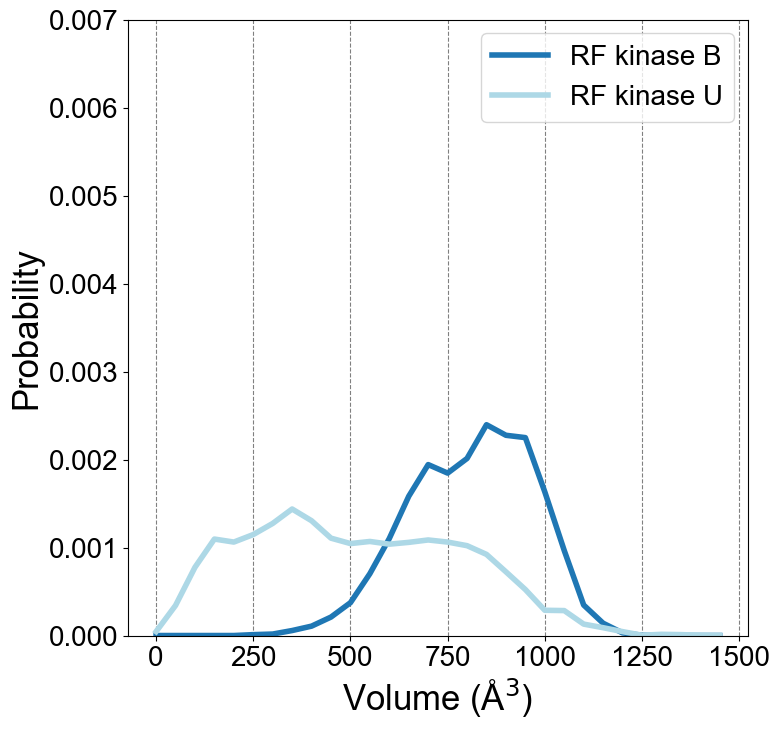

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(x_prot_holo[:-1],(y_prot_holo+y_prot_holo)/(2), label="RF kinase B", c="C0",linewidth=4)
plt.plot(x_prot_apo[:-1],(y_prot_apo+y_prot_apo)/(2), label="RF kinase U", c="lightblue", linewidth=4)
plt.legend(fontsize=20)
#plt.xticks([0,1,2,3,4,5])
plt.ylim(0,0.007)
plt.grid(axis='x', ls='--', color='grey')

plt.ylabel("Probability", fontsize=25)
plt.xlabel('Volume (Å$^3$)',fontsize=25)
#plt.xlabel('Volume ($\AA^3$)',fontsize=25)
plt.savefig('./updated_img/prot_volums_new_col.png', dpi=600, bbox_inches='tight')

## FIG 5B

In [ ]:
volumes_bound1=pd.read_csv("../data/POVME_volumes_fmn_bound_1.tabbed.txt",header=None, delimiter="\t")
volumes_bound2=pd.read_csv("../data/POVME_volumes_fmn_bound_2.tabbed.txt",header=None, delimiter="\t")
volumes_bound3=pd.read_csv("../data/POVME_volumes_fmn_bound_3.tabbed.txt",header=None, delimiter="\t")
volumes_bound=pd.concat((volumes_holo1,volumes_holo2,volumes_holo3))
del volumes_bound1
del volumes_bound2
del volumes_bound3

volumes_unbound1=pd.read_csv("../data/POVME_volumes_fmn_unbound_1.tabbed.txt",header=None, delimiter="\t")
volumes_unbound2=pd.read_csv("../data/POVME_volumes_fmn_unbound_2.tabbed.txt",header=None, delimiter="\t")
volumes_unbound3=pd.read_csv("../data/POVME_volumes_fmn_unbound_3.tabbed.txt",header=None, delimiter="\t")
volumes_unbound=pd.concat((volumes_apo1,volumes_apo2,volumes_apo3))
del volumes_unbound1
del volumes_unbound2
del volumes_unbound3


In [ ]:
y_fmn_unbound,x_fmn_unbound=np.histogram(np.array(volumes_unbound[1])[np.where(volumes_unbound[1]!=0)],bins=50,density=True,range=(0,1500))
y_fmn_bound,x_fmn_bound=np.histogram(np.array(volumes_bound[1])[np.where(volumes_bound[1]!=0)],bins=50,density=True,range=(0,1500))

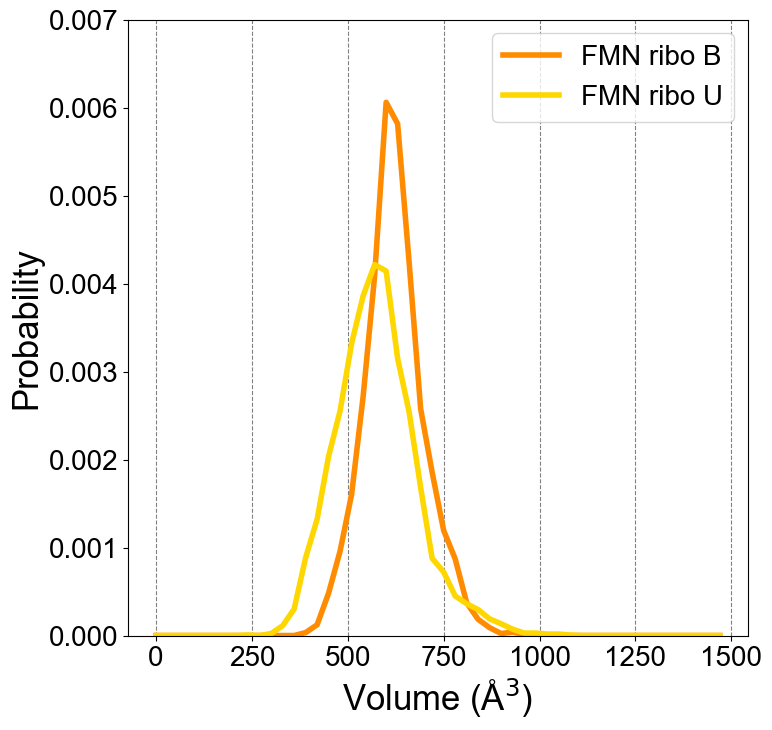

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(x_fmn_bound[:-1],(y_fmn_bound+y_fmn_bound)/(2), label="FMN ribo B",c="darkorange", linewidth=4) #  label="FMN Riboswitch B"
plt.plot(x_fmn_unbound[:-1],(y_fmn_unbound+y_fmn_unbound)/(2), label="FMN ribo U",c="gold", linewidth=4)
plt.legend(fontsize=20)
#plt.xticks([0,1,2,3,4,5])
plt.ylim(0,0.007)

plt.grid(axis='x', ls='--', color='grey')

plt.ylabel("Probability", fontsize=25)
plt.xlabel('Volume (Å$^3$)',fontsize=25)
plt.savefig('./updated_img/prob_volunes_rna_new_col.png', dpi=600, bbox_inches='tight')

## FIG 6

In [ ]:
data_delphi=pd.read_csv("../data/AnalysisPB.csv")
data_delphi_2=pd.read_csv("../data/RNA.csv")

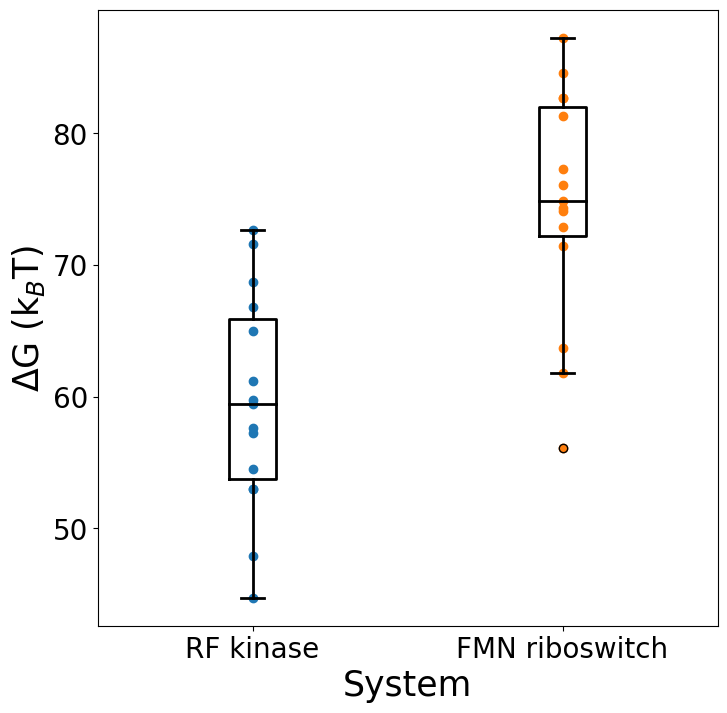

In [ ]:
plt.figure(figsize=(8,8))
box=plt.boxplot(mydict.values(), labels=mydict.keys(),zorder=2)
# change the color of its elements
for _, line_list in box.items():
    for line in line_list:
        line.set_color('black')
        line.set_linewidth(2)
plt.scatter([1]*len(data_delphi["DeltaG"]),data_delphi["DeltaG"],zorder=1)
plt.scatter([2]*len(data_delphi_2["DeltaG"]),data_delphi_2["DeltaG"])
plt.ylabel("ΔG (k$_B$T)", fontsize=25)
plt.xticks([1,2],["RF kinase","FMN riboswitch"], fontsize=20)
plt.xlabel("System", fontsize=25)
plt.yticks(fontsize=20)
plt.savefig("boxplot_updated.png",dpi=300, bbox_inches='tight')

## FIG 7 A

In [ ]:
HB_fmnribo_1_acc=np.load("HB_RNA_1_acc.count_by_ids.npy")
HB_fmnribo_2_acc=np.load("HB_RNA_2_acc.count_by_ids.npy")
HB_fmnribo_3_acc=np.load("HB_RNA_3_acc.count_by_ids.npy")
HB_fmnribo_1_don=np.load("HB_RNA_1_don.count_by_ids.npy")
HB_fmnribo_2_don=np.load("HB_RNA_2_don.count_by_ids.npy")
HB_fmnribo_3_don=np.load("HB_RNA_3_don.count_by_ids.npy")

In [ ]:
fmnrbo_bound_1=mda.Universe('/media/data/Riboflavin/Riboswitch/Holo/replica_1/prod_rna_holo_1_1_w_j_fix_notwater.tpr',
                       '/media/data/Riboflavin/Riboswitch/Holo/replica_1/prod_rna_holo_1_1_w_j_fix_notwater.xtc')

In [ ]:
heteroatoms=fmnrbo_bound_1.select_atoms('resname RBF and (name O* or name N*)')

In [ ]:
values=np.zeros_like(heteroatoms.ids)

In [ ]:
rbf_donor=dict(zip((heteroatoms.ids),values))

In [ ]:
HB_fmnribo_bound_acc=np.concatenate((HB_RNA_1_acc.count_by_ids(),HB_RNA_2_acc.count_by_ids(),HB_RNA_3_acc.count_by_ids()))

In [ ]:
HB_fmnribo_bound_don=np.concatenate((HB_RNA_1_don.count_by_ids(),HB_RNA_2_don.count_by_ids(),HB_RNA_3_don.count_by_ids()))

In [ ]:
HB_fmnribo_bound_acc=np.concatenate((HB_RNA_1_acc,HB_RNA_2_acc,HB_RNA_3_acc))

In [ ]:
HB_fmnribo_bound_don=np.concatenate((HB_RNA_1_don,HB_RNA_2_don,HB_RNA_3_don))

In [ ]:
x=HB_fmnribo_bound_don
for i,j in enumerate(x[:,0]):
    if j in rbf_donor.keys():
        rbf_donor[j]+=x[i,3]   
    else:
         pass

In [ ]:
rbf_acceptor=dict(zip((heteroatoms.ids),values))

In [ ]:
x=HB_fmnribo_bound_acc
for i,j in enumerate(x[:,2]):
    if j in rbf_acceptor.keys():
        rbf_acceptor[j]+=x[i,3]   
    else:
         pass

In [ ]:
x=rbf_acceptor.keys()

In [ ]:
yA=np.array(list(rbf_acceptor.values()))
yD=np.array(list(rbf_donor.values()))

In [ ]:
df_names=pd.DataFrame(index=heteroatoms.atoms.ids,columns=['Name'])

In [ ]:
df_names.loc[:,'Name']=heteroatoms.atoms.names
x=df_names['Name']

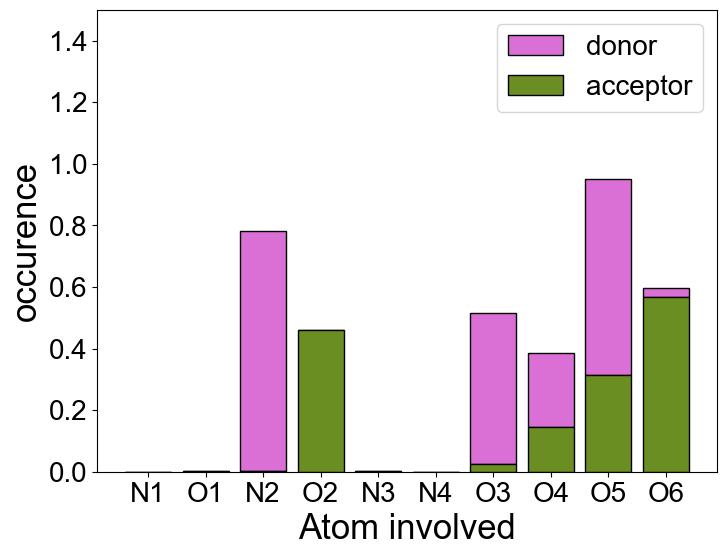

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(x, yD/(len(fmnribo_bound_1.trajectory)*3), bottom=yA/(len(fmnribo_bound_1.trajectory)*3), label = 'donor',color="orchid", edgecolor="black")
plt.bar(x, yA/(len(fmnribo_bound_1.trajectory)*3),label = 'acceptor',color="olivedrab", edgecolor="black")
plt.ylim(0,1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)
plt.xlabel('Atom involved', fontsize=25)
plt.ylabel('occurence', fontsize=25)

plt.ylim(0,1.5)
#plt.savefig('Pics_paper/H-Bond-profile-protein.png', dpi=300, bbox_inches='tight')
plt.savefig('updated_img/H-Bond-profile-rna-updated.png', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
df_names=pd.read_csv("x_prot.csv", index_col=0)

In [ ]:
df_names
x=df_names['Name']

In [ ]:
yA=np.load("yA_prot.npy")
yD=np.load("yD_prot.npy")

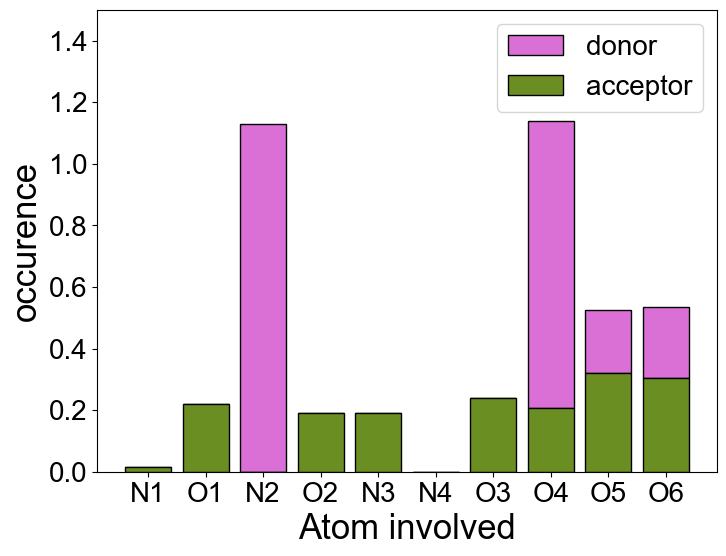

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(x, yD/(len(rfkinase_bound_1.trajectory)*3), bottom=yA/(len(rfkinase_bound_1.trajectory)*3), label = 'donor',color="orchid", edgecolor="black")
plt.bar(x, yA/(len(rfkinase_bound_1.trajectory)*3),label = 'acceptor',color="olivedrab", edgecolor="black")
plt.ylim(0,1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)
plt.xlabel('Atom involved', fontsize=25)
plt.ylabel('occurence', fontsize=25)

plt.ylim(0,1.5)
#plt.savefig('Pics_paper/H-Bond-profile-protein.png', dpi=300, bbox_inches='tight')
plt.savefig('updated_img/H-Bond-profile-protein-updated.png', dpi=300, bbox_inches='tight')

plt.show()


## FIG 7B

In [ ]:
dihedrals_prot_1=np.load("./data/dihedrals_prot_1.npy")
dihedrals_prot_2=np.load("./data/dihedrals_prot_2.npy")
dihedrals_prot_3=np.load("./data/dihedrals_prot_3.npy")
dihedrals_rna_1=np.load("./data/dihedrals_rna_1.npy")
dihedrals_rna_2=np.load("./data/dihedrals_rna_2.npy")
dihedrals_rna_3=np.load("./data/dihedrals_rna_3.npy")

In [ ]:
dihedrals_rna=np.concatenate((dihedrals_rna_1,dihedrals_rna_2,dihedrals_rna_3))

In [ ]:
dihedrals_prot=np.concatenate((dihedrals_prot_1,dihedrals_prot_2,dihedrals_prot_3))

In [ ]:
lig=mda.Universe("/media/data/Riboflavin/Lig_Water/only_lig.tpr","/media/data/Riboflavin/Lig_Water/RBF_water_dynamics.xtc")

In [ ]:
C1=lig.select_atoms('id 23 and name C*')
C2=lig.select_atoms('id 25 and name C*')
N1=lig.select_atoms('id 26 and name N*')
C3=lig.select_atoms('id 27 and name C*')
C4=lig.select_atoms('id 30 and name C*')
C5=lig.select_atoms('id 34 and name C*')
C6=lig.select_atoms('id 38 and name C*')
C7=lig.select_atoms('id 42 and name C*')
O7=lig.select_atoms('id 45 and name O*')

In [ ]:
di_1=C1+C2+N1+C3
di_2=N1+C3+C4+C5
di_3=C3+C4+C5+C6
di_4=C4+C5+C6+C7
di_5=C5+C6+C7+O7

In [ ]:
dihedrals_water=np.empty((len(lig.trajectory),5))
for i,ts in enumerate(lig.trajectory):
    dihedrals_water[i,0]=di_1.dihedral.value()
    dihedrals_water[i,1]=di_2.dihedral.value()
    dihedrals_water[i,2]=di_3.dihedral.value()
    dihedrals_water[i,3]=di_4.dihedral.value()    
    dihedrals_water[i,4]=di_5.dihedral.value()    

In [ ]:
r_w2=np.random.uniform(0,0.5,3001)
r_2=np.random.uniform(0,0.5,len(dihedrals_rna[::10]))
r_w3=np.random.uniform(0.55,1,3001)
r_3=np.random.uniform(0.55,1,len(dihedrals_rna[::10]))
r_w4=np.random.uniform(1.05,1.5,3001)
r_4=np.random.uniform(1.05,1.5,len(dihedrals_rna[::10]))
r_w5=np.random.uniform(1.55,2,3001)
r_5=np.random.uniform(1.55,2,len(dihedrals_rna[::10]))

<Figure size 1000x1000 with 0 Axes>

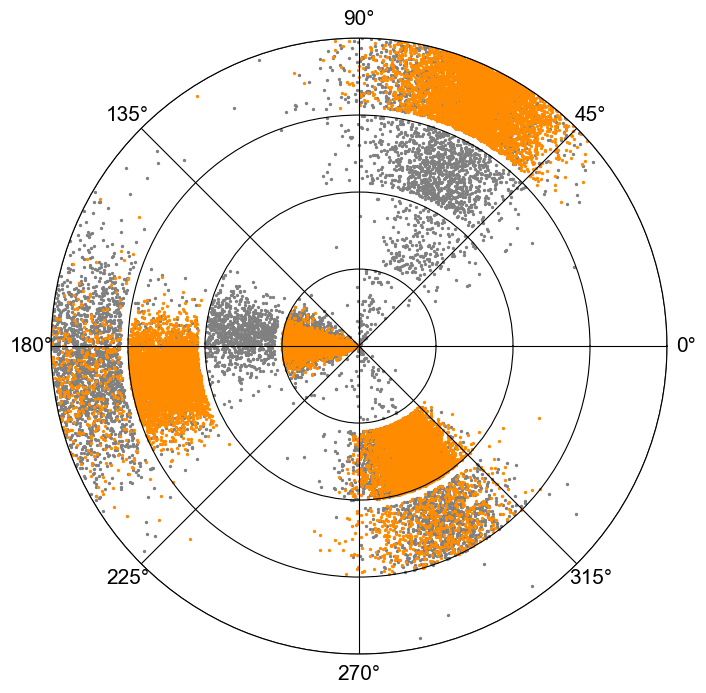

In [ ]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8),subplot_kw={'projection': 'polar'})
ax.scatter(dihedrals_water[:3003,1]/180*np.pi,r_w2, s=2, c="grey" )
ax.scatter(dihedrals_water[:3003,2]/180*np.pi,r_w3, s=2, c="grey" )
ax.scatter(dihedrals_water[:3003,3]/180*np.pi,r_w4, s=2, c="grey" )
ax.scatter(dihedrals_water[:3003,4]/180*np.pi,r_w5, s=2, c="grey" )
ax.scatter(dihedrals_rna[:,1][::10]/180*np.pi,r_2, s=2, c="darkorange" )
ax.scatter(dihedrals_rna[:,2][::10]/180*np.pi,r_3, s=2, c="darkorange" )
ax.scatter(dihedrals_rna[:,3][::10]/180*np.pi,r_4, s=2, c="darkorange" )
ax.scatter(dihedrals_rna[:,4][::10]/180*np.pi,r_5, s=2, c="darkorange" )
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2], labels=[r'$\alpha', '1', '1.5', '2'], fontsize=0)
ax.set_yticklabels([])
ax.set_thetagrids([0,45,90,135,180,225,270,315], fontsize=15)
ax.grid(True, c="black")
plt.savefig('updated_img/diedri_rna.png', dpi=300, bbox_inches='tight')


In [ ]:
#r_w2=np.random.uniform(0,0.5,3001)
r_2=np.random.uniform(0,0.5,len(dihedrals_prot[::10]))
#r_w3=np.random.uniform(0.55,1,3001)
r_3=np.random.uniform(0.55,1,len(dihedrals_prot[::10]))
#r_w4=np.random.uniform(1.05,1.5,3001)
r_4=np.random.uniform(1.05,1.5,len(dihedrals_prot[::10]))
#r_w5=np.random.uniform(1.55,2,3001)
r_5=np.random.uniform(1.55,2,len(dihedrals_prot[::10]))

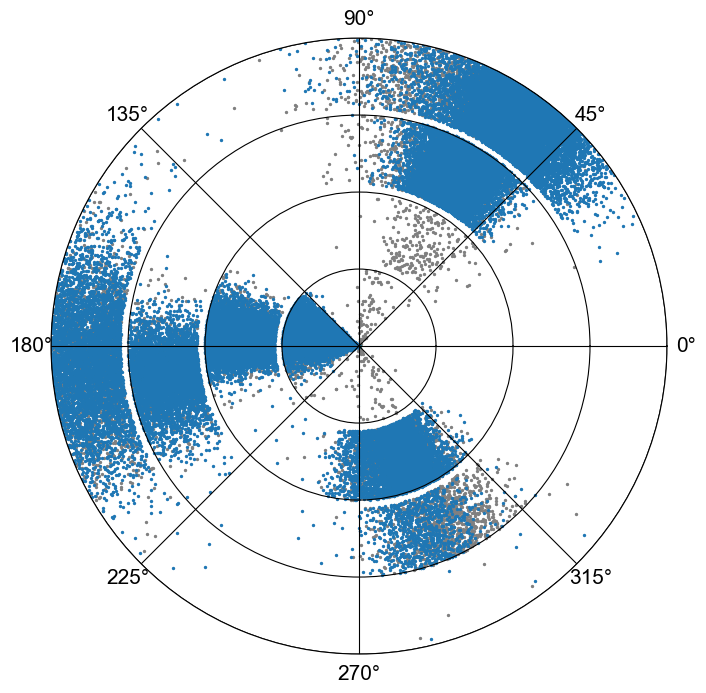

In [ ]:
plt.figure
fig, ax = plt.subplots(figsize=(8,8),subplot_kw={'projection': 'polar'})
ax.scatter(dihedrals_water[:3003,1]/180*np.pi,r_w2, s=2, c="grey" )
ax.scatter(dihedrals_water[:3003,2]/180*np.pi,r_w3, s=2, c="grey" )
ax.scatter(dihedrals_water[:3003,3]/180*np.pi,r_w4, s=2, c="grey" )
ax.scatter(dihedrals_water[:3003,4]/180*np.pi,r_w5, s=2, c="grey" )
ax.scatter(dihedrals_prot[:,1][::10]/180*np.pi,r_2, s=2, c="C0" )
ax.scatter(dihedrals_prot[:,2][::10]/180*np.pi,r_3, s=2, c="C0" )
ax.scatter(dihedrals_prot[:,3][::10]/180*np.pi,r_4, s=2, c="C0" )
ax.scatter(dihedrals_prot[:,4][::10]/180*np.pi,r_5, s=2, c="C0" )
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2], labels=['0.5', '1', '1.5', '2'], fontsize=0)
ax.set_rlabel_position(0)
ax.set_thetagrids([0,45,90,135,180,225,270,315], fontsize=15)
ax.grid(True, c="black")
plt.savefig('updated_img/diedri_prot.png', dpi=300, bbox_inches='tight')


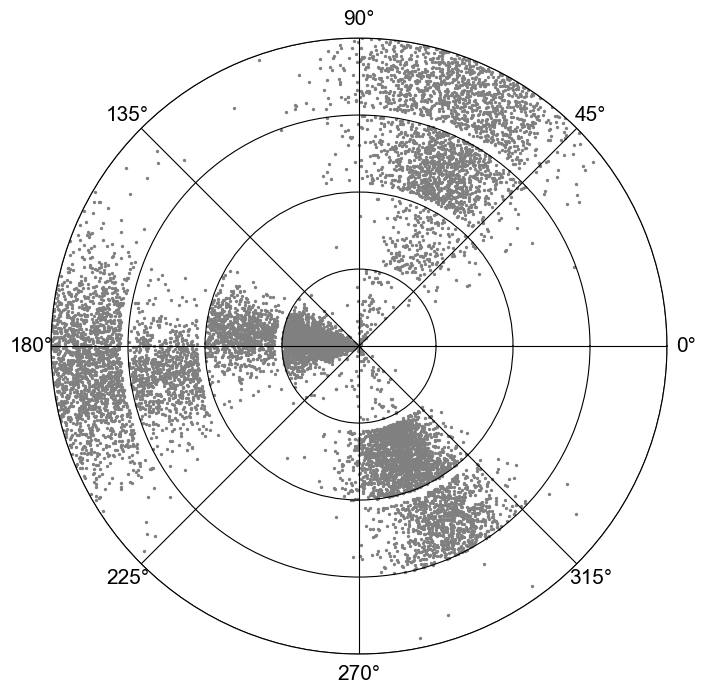

In [ ]:
plt.figure
fig, ax = plt.subplots(figsize=(8,8),subplot_kw={'projection': 'polar'})
ax.scatter(dihedrals_water[:3003,1]/180*np.pi,r_w2, s=2, c="grey" )
ax.scatter(dihedrals_water[:3003,2]/180*np.pi,r_w3, s=2, c="grey" )
ax.scatter(dihedrals_water[:3003,3]/180*np.pi,r_w4, s=2, c="grey" )
ax.scatter(dihedrals_water[:3003,4]/180*np.pi,r_w5, s=2, c="grey" )
#ax.scatter(dihedrals_prot[:,1][::10]/180*np.pi,r_2, s=2, c="C0" )
#ax.scatter(dihedrals_prot[:,2][::10]/180*np.pi,r_3, s=2, c="C0" )
#ax.scatter(dihedrals_prot[:,3][::10]/180*np.pi,r_4, s=2, c="C0" )
#ax.scatter(dihedrals_prot[:,4][::10]/180*np.pi,r_5, s=2, c="C0" )
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2], labels=['0.5', '1', '1.5', '2'], fontsize=0)
ax.set_rlabel_position(0)
ax.set_thetagrids([0,45,90,135,180,225,270,315], fontsize=15)
ax.grid(True, c="black")
plt.savefig('updated_img/diedri_wat.png', dpi=300, bbox_inches='tight')


## FIG 8

In [ ]:
#prot holo data
PROT_HOLO_water_1=np.load("./PROT_HOLO_water_1.npz")
PROT_HOLO_water_2=np.load("./PROT_HOLO_water_2.npz")
PROT_HOLO_water_3=np.load("./PROT_HOLO_water_3.npz")
#prot apo data
PROT_APO_water_1=np.load("./PROT_APO_water_1.npz")
PROT_APO_water_2=np.load("./PROT_APO_water_2.npz")
PROT_APO_water_3=np.load("./PROT_APO_water_3.npz")

#RNA holo data
RNA_HOLO_water_1=np.load("./RNA_HOLO_water_1.npz")
RNA_HOLO_water_2=np.load("./RNA_HOLO_water_2.npz")
RNA_HOLO_water_3=np.load("./RNA_HOLO_water_3.npz")
#RNA apo data
RNA_APO_water_1=np.load("./RNA_APO_water_1.npz")
RNA_APO_water_2=np.load("./RNA_APO_water_2.npz")
RNA_APO_water_3=np.load("./RNA_APO_water_3.npz")

In [ ]:
mean_apo_prot=np.mean((PROT_APO_water_1["timeseries"],
    PROT_APO_water_2["timeseries"], 
    PROT_APO_water_3["timeseries"]),
    axis=0)

mean_holo_prot=np.mean((PROT_HOLO_water_1["timeseries"],
    PROT_HOLO_water_2["timeseries"], 
    PROT_HOLO_water_3["timeseries"]),
    axis=0)

mean_apo_rna=np.mean((RNA_APO_water_1["timeseries"],
    RNA_APO_water_2["timeseries"], 
    RNA_APO_water_3["timeseries"]),
    axis=0)

mean_holo_rna=np.mean((RNA_HOLO_water_1["timeseries"],
    RNA_HOLO_water_2["timeseries"], 
    RNA_HOLO_water_3["timeseries"]),
    axis=0)

In [ ]:
std_apo_prot=np.std((PROT_APO_water_1["timeseries"],
    PROT_APO_water_2["timeseries"], 
    PROT_APO_water_3["timeseries"]),
    axis=0)

std_holo_prot=np.std((PROT_HOLO_water_1["timeseries"],
    PROT_HOLO_water_2["timeseries"], 
    PROT_HOLO_water_3["timeseries"]),
    axis=0)

std_apo_rna=np.std((RNA_APO_water_1["timeseries"],
    RNA_APO_water_2["timeseries"], 
    RNA_APO_water_3["timeseries"]),
    axis=0)

std_holo_rna=np.std((RNA_HOLO_water_1["timeseries"],
    RNA_HOLO_water_2["timeseries"], 
    RNA_HOLO_water_3["timeseries"]),
    axis=0)

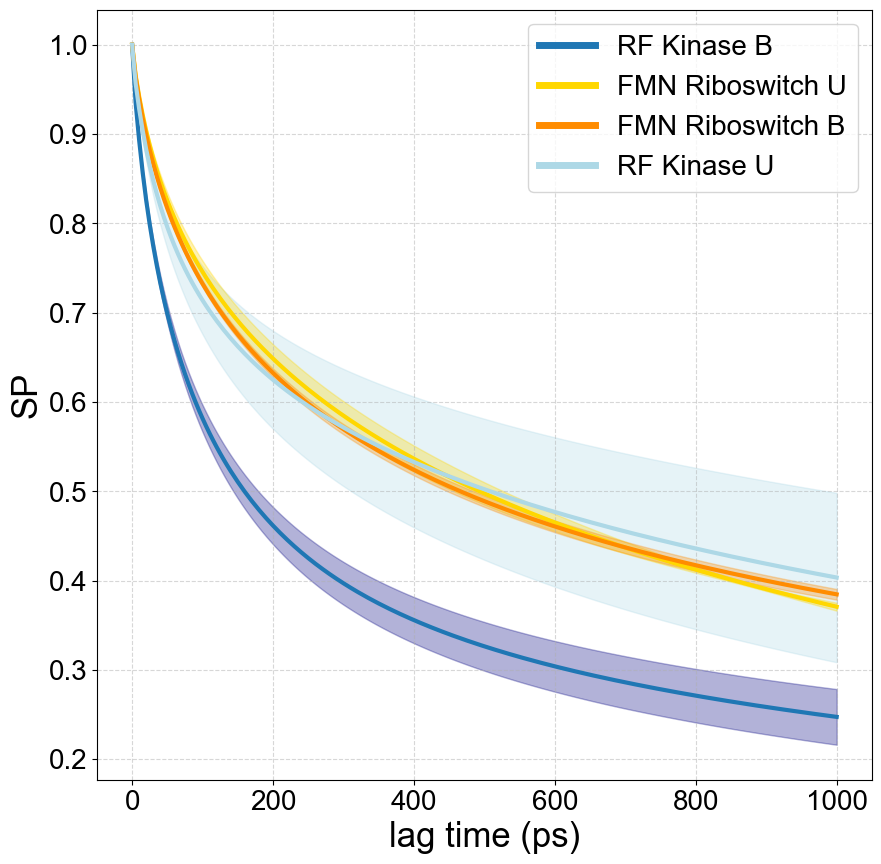

In [ ]:
plt.figure(figsize=(10,10))

#plt.plot(np.linspace(0,1000, num=21),mean_apo_prot,color="lightblue", label="RF Kinase U",lw=3)
plt.fill_between(np.linspace(0,1000, num=201),mean_apo_prot-std_apo_prot,mean_apo_prot+std_apo_prot,color="lightblue",alpha=0.3)

plt.plot(np.linspace(0,1000, num=201),mean_holo_prot,color="C0", label="RF kinase B",lw=3)
plt.fill_between(np.linspace(0,1000, num=201),mean_holo_prot-std_holo_prot,mean_holo_prot+std_holo_prot,color="navy",alpha=0.3)

#plt.plot(np.linspace(0,1000, num=21),mean_apo_rna,color="gold", label="FMN Riboswitch U",lw=3)
plt.fill_between(np.linspace(0,1000, num=201),mean_apo_rna-std_apo_rna,mean_apo_rna+std_apo_rna,color="gold",alpha=0.3)

plt.plot(np.linspace(0,1000, num=201),mean_apo_rna,color="gold", label="FMN ribo U",lw=3)
plt.plot(np.linspace(0,1000, num=201),mean_holo_rna,color="darkorange", label="FMN ribo B",lw=3)
plt.plot(np.linspace(0,1000, num=201),mean_apo_prot,color="lightblue", label="RF kinase U",lw=3)
plt.fill_between(np.linspace(0,1000, num=201),mean_holo_rna-std_holo_rna,mean_holo_rna+std_holo_rna,color="darkorange",alpha=0.3)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('lag time (ps)', fontsize=25)
plt.ylabel('SP', fontsize=25)

plt.grid(linestyle="--", alpha=0.5)
leg=plt.legend(fontsize=20)
for line in leg.get_lines():
    line.set_linewidth(5.0)
#plt.savefig("./updated_img/water_SP.png", dpi=300, bbox_inches='tight')
plt.show()
